<a id="contents"></a>

<center style ="font-size: xx-large; font-weight: 600; line-height: 1.1;">
Advanced Statistics Homework 5
</center>  
<center>
Jake Jackson - 2046805 
</center>

## Contents 
  
* [Exercise 1: Radioactive source](#ex1)   
* [Exercise 2: Lighthouse Problem](#ex2)   
* [Exercise 3: Signal over Background](#ex3)

<a href ="#contents">
<p style="text-align: right;">return to contents</p>
</a>  
<a id="ex1"></a> 

## Exercise 1: Radioactive source
The number of particles emitted by a radioactive source during a fixed interval of time $(∆t = 10 s)$ follows a Poisson distribution on the parameter µ. The number of particles observed during consecutive time intervals is: 4, 1, 3, 1 and 3

#### (a) Suppose a uniform prior distribution for the parameter $µ$ 
determine and draw the posterior distribution for µ, given the data- evaluate mean, median and variance, both analytically and numerically in R

#### Poisson process 
An event might happen in a given time with following condition 
probability of one count in $\Delta t$ 

$$p = P('1 \text{ count in } \Delta t') = r\Delta t$$

The likeihood for a single measurement of a Poisson process is

$\{y_i\}$ is the measurment set

$$ f(\{y_j\} | \mu)= \frac{\mu^y e^{-\mu}}{y!}$$

With $\mu > 1$ and $y = 0, 1,... $

In the case if mutiple measurements it follows that

$$f\left(\left\{y_{j}\right\} | \mu\right)=\prod_{j=1}^{n} f\left(y_{j} | \mu\right) \quad \propto \quad \mu^{\sum x_{j}} \times \mathrm{e}^{(-n \mu)}$$


This is very simliar to the gamma distribution function

$$\operatorname{Gamma}(y | \alpha, \lambda)=k y^{\alpha-1} \mathrm{e}^{-\lambda y}$$

Through direct comparison

$\alpha  = \sum y_i+1 $ and $\lambda = n$ 

## Uniform Proir

$g(\mu)=1$ for $\mu >0$

Posterior becomes

\begin{aligned}
P\left(\mu \mid\left\{y_{j}\right\}\right) & \propto f\left(\left\{y_{j}\right\} \mid \mu\right) \times g(\mu) \\
& \propto \mu^{\Sigma y_{j}} \mathrm{e}^{-n \mu}
\end{aligned}


For a gamma distribution

$$mean = \frac{\alpha}{\lambda}, \hspace{20pt} Var = \frac{\alpha}{\lambda^2}$$


#### (c) evaluate a 95% credibility interval for the results obtained with both priors.  
Compare the result with that obtained using a normal approximation for the posterior distribution, with the same mean and standard deviation

### Uniform Analytical solution 

In [178]:
dt <- 10 
y <- c(4,1,3,1,3) #number detected
n <- length(y)
lambda <- n
alpha <- sum(y)+1
dmu <- 0.01
mu <-seq(0, 10, dmu)

posterior_uniform <- dgamma(mu, alpha, n)

mean_uni <- alpha/lambda
var_uni <- alpha/(lambda^2)
# analytical median not possible 
cat("n=", n, ", alpha = ", alpha, ", mean = ",
    mean_uni, "varience = ", var_uni)

n= 5 , alpha =  13 , mean =  2.6 varience =  0.52

### Uniform numerical solution

[1] 2.6

[1] 0.52

mean =  2.6 , varience =  0.52 , median =  2.533646m1 =  1.186624 m2 =  1.18665

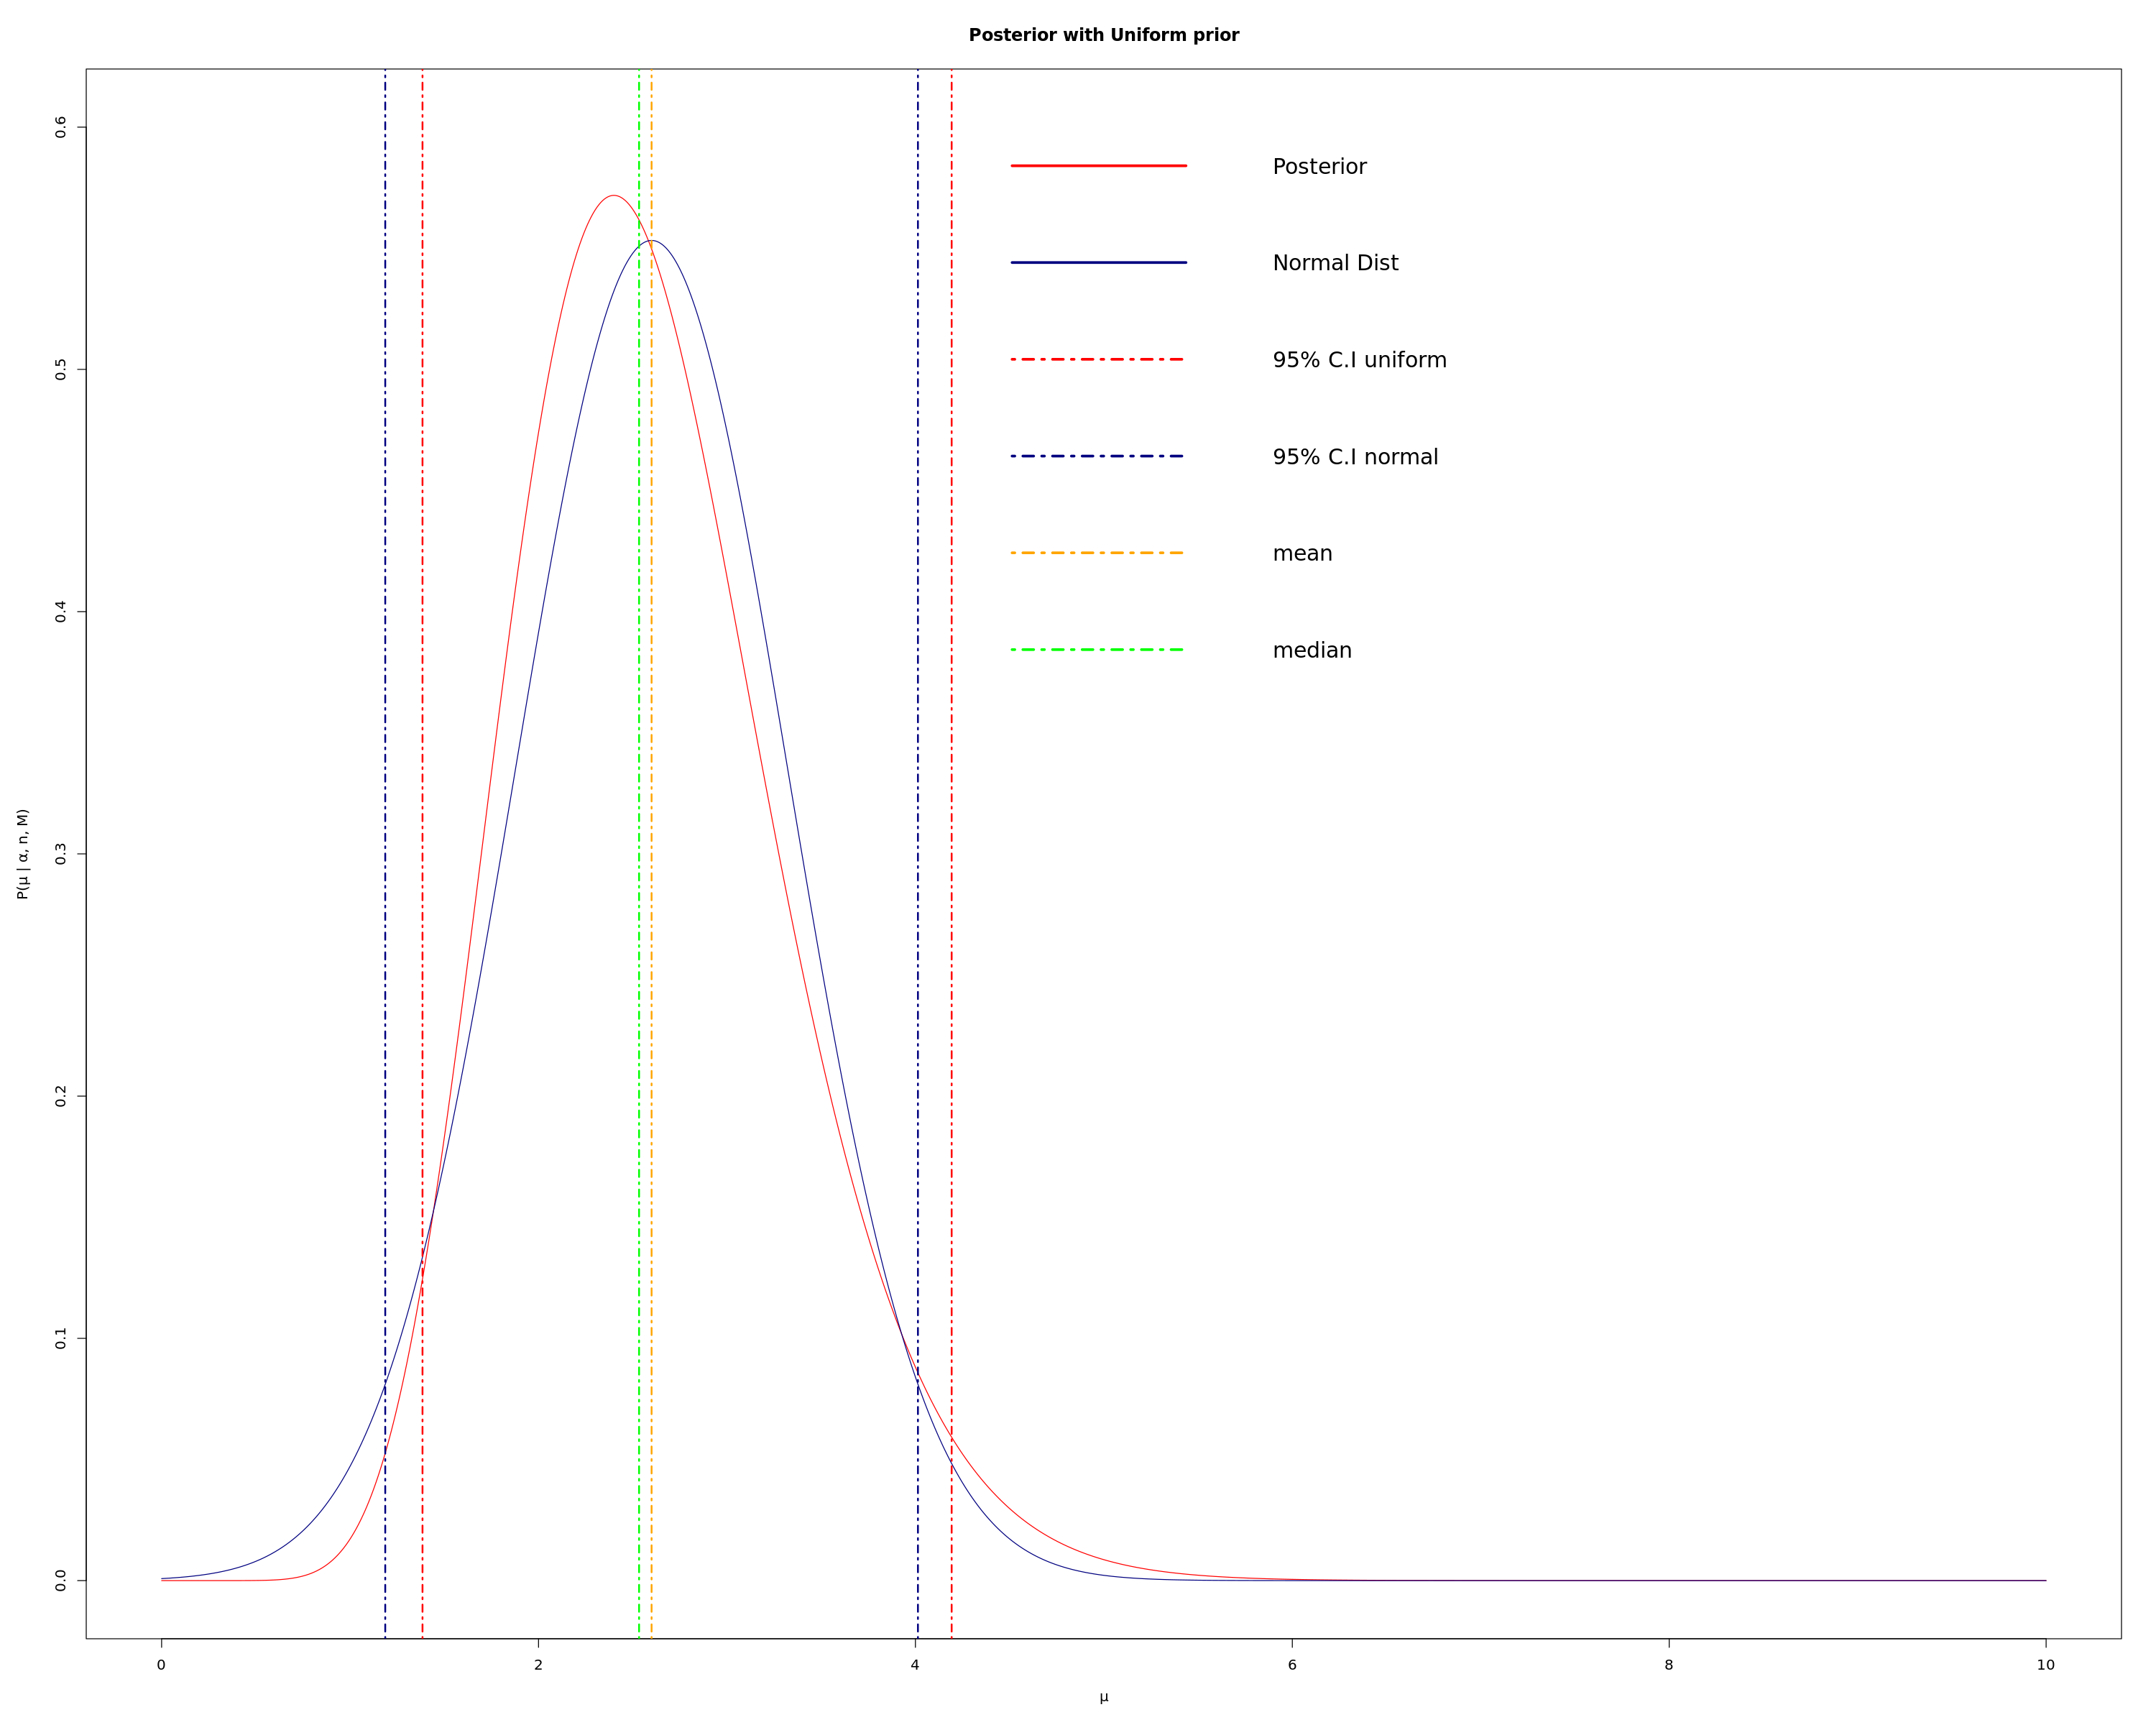

In [195]:
# numerical solutions
exp_mu_uni <- function(mu){
     return(dgamma(mu, alpha, n)*mu) 
}

exp_mu_sq_uni <- function(mu){
     return(dgamma(mu, alpha, n)*mu*mu) 
}

mean_num_uni<-integrate(exp_mu_uni, lower=0, upper= Inf)$value
exp_sq_uni <- integrate(exp_mu_sq_uni, lower=0, upper= Inf)$value
var_num_uni <- exp_sq_uni - mean_num_uni^2

mean_num_uni #just left these to show that its not excactly the true values
var_num_uni #it gets rounded in the concatinate 
median_num_uni <- qgamma(0.5, alpha, n)

cat("mean = ", mean_num_uni, ", varience = ", var_num_uni, ", median = ", median_num_uni)

CI_95_l_uni <- qgamma(0.025, alpha, n)
CI_95_u_uni <- qgamma(0.975, alpha, n)

norm <- dnorm(mu, mean_uni, sqrt(var_uni))
mu_95_l_norm <- qnorm(0.025,mean_uni,sqrt(var_uni)) 
mu_95_h_norm <- qnorm(0.975,mean_uni,sqrt(var_uni))

cat("m1 = ",mu1_norm, "m2 = ", mu1_norm2)

par(mar=c(5, 5, 4, 2))

plot(mu, posterior_uniform, xlim=c(0,10), ylim=c(0,0.6),
     col="red",
     type="l",
     main="Posterior with Uniform prior", 
     xlab=expression(mu), 
     ylab=expression(paste("P(", mu, " | ",alpha,", n, M)")),)

lines(mu, norm, col="navy")
abline(v=CI_95_l_uni, col='red', lty=4, lwd=2)
abline(v=CI_95_u_uni, col='red', lty=4, lwd=2)
abline(v=mean_uniform, col='orange', lty=4, lwd=2)
abline(v=median_num_uni, col='green', lty=4, lwd=2)
abline(v=mu_95_l_norm, col='navy', lty=4, lwd=2)
abline(v=mu_95_h_norm, col='navy', lty=4, lwd=2)

legend('topright', col=c("red","navy", "red", "navy",  "orange", "green"), 
       lty=c(1,1, 4, 4, 4, 4), bty='n', cex=1.5, lwd=3,
       legend = c("Posterior","Normal Dist", "95% C.I uniform ", "95% C.I normal ", "mean", "median")
         )

### (b) suppose a Jeffrey’s prior for the parameter µ
determine and draw the posterior distribution for µ, given the data- evaluate mean, median and variance, both analytically and numerically in R 

Jeffrey's prior if $\mu > 0$
$$g(\mu) \propto \frac{1}{\sqrt{\mu}}$$

Combining with likelihood,    
\begin{aligned}
&P\left(\mu \mid\left\{y_{j}\right\}\right) \quad \propto \quad f\left(\left\{y_{j}\right\} \mid \mu\right) \times g(\mu)\\
&\propto \quad \mu^{\Sigma y_{j}} \quad \mathrm{e}^{-n \mu} \times \frac{1}{\sqrt{\mu}}\\
&\propto \quad \mu^{\sum y_{j}-1 / 2} \mathrm{e}^{-n \mu}
\end{aligned}

Therefore through inspection it can be seen that the function is
$\text{Gamma}(\alpha, \beta)$ function with $\alpha=\sum y_i +\frac{1}{2}$
and $\lambda = n $  

### Jeffrey’s prior analytical solution 

In [199]:
alpha_jef <- sum(y)+0.5
posterior_jef<-dgamma(mu, alpha_jef, n)
lambda <- n

mean_jef <- alpha_jef/lambda
var_jef <- alpha_jef /(lambda^2)

cat("n=", n, ", alpha = ", alpha_jef, ", mean = ",
    mean_jef, "varience = ", var_jef)

n= 5 , alpha =  12.5 , mean =  2.5 varience =  0.5

### Jeffrey’s prior numerical solution

[1] 2.5

[1] 0.5

mean =  2.5 , varience =  0.5 , median =  2.533646

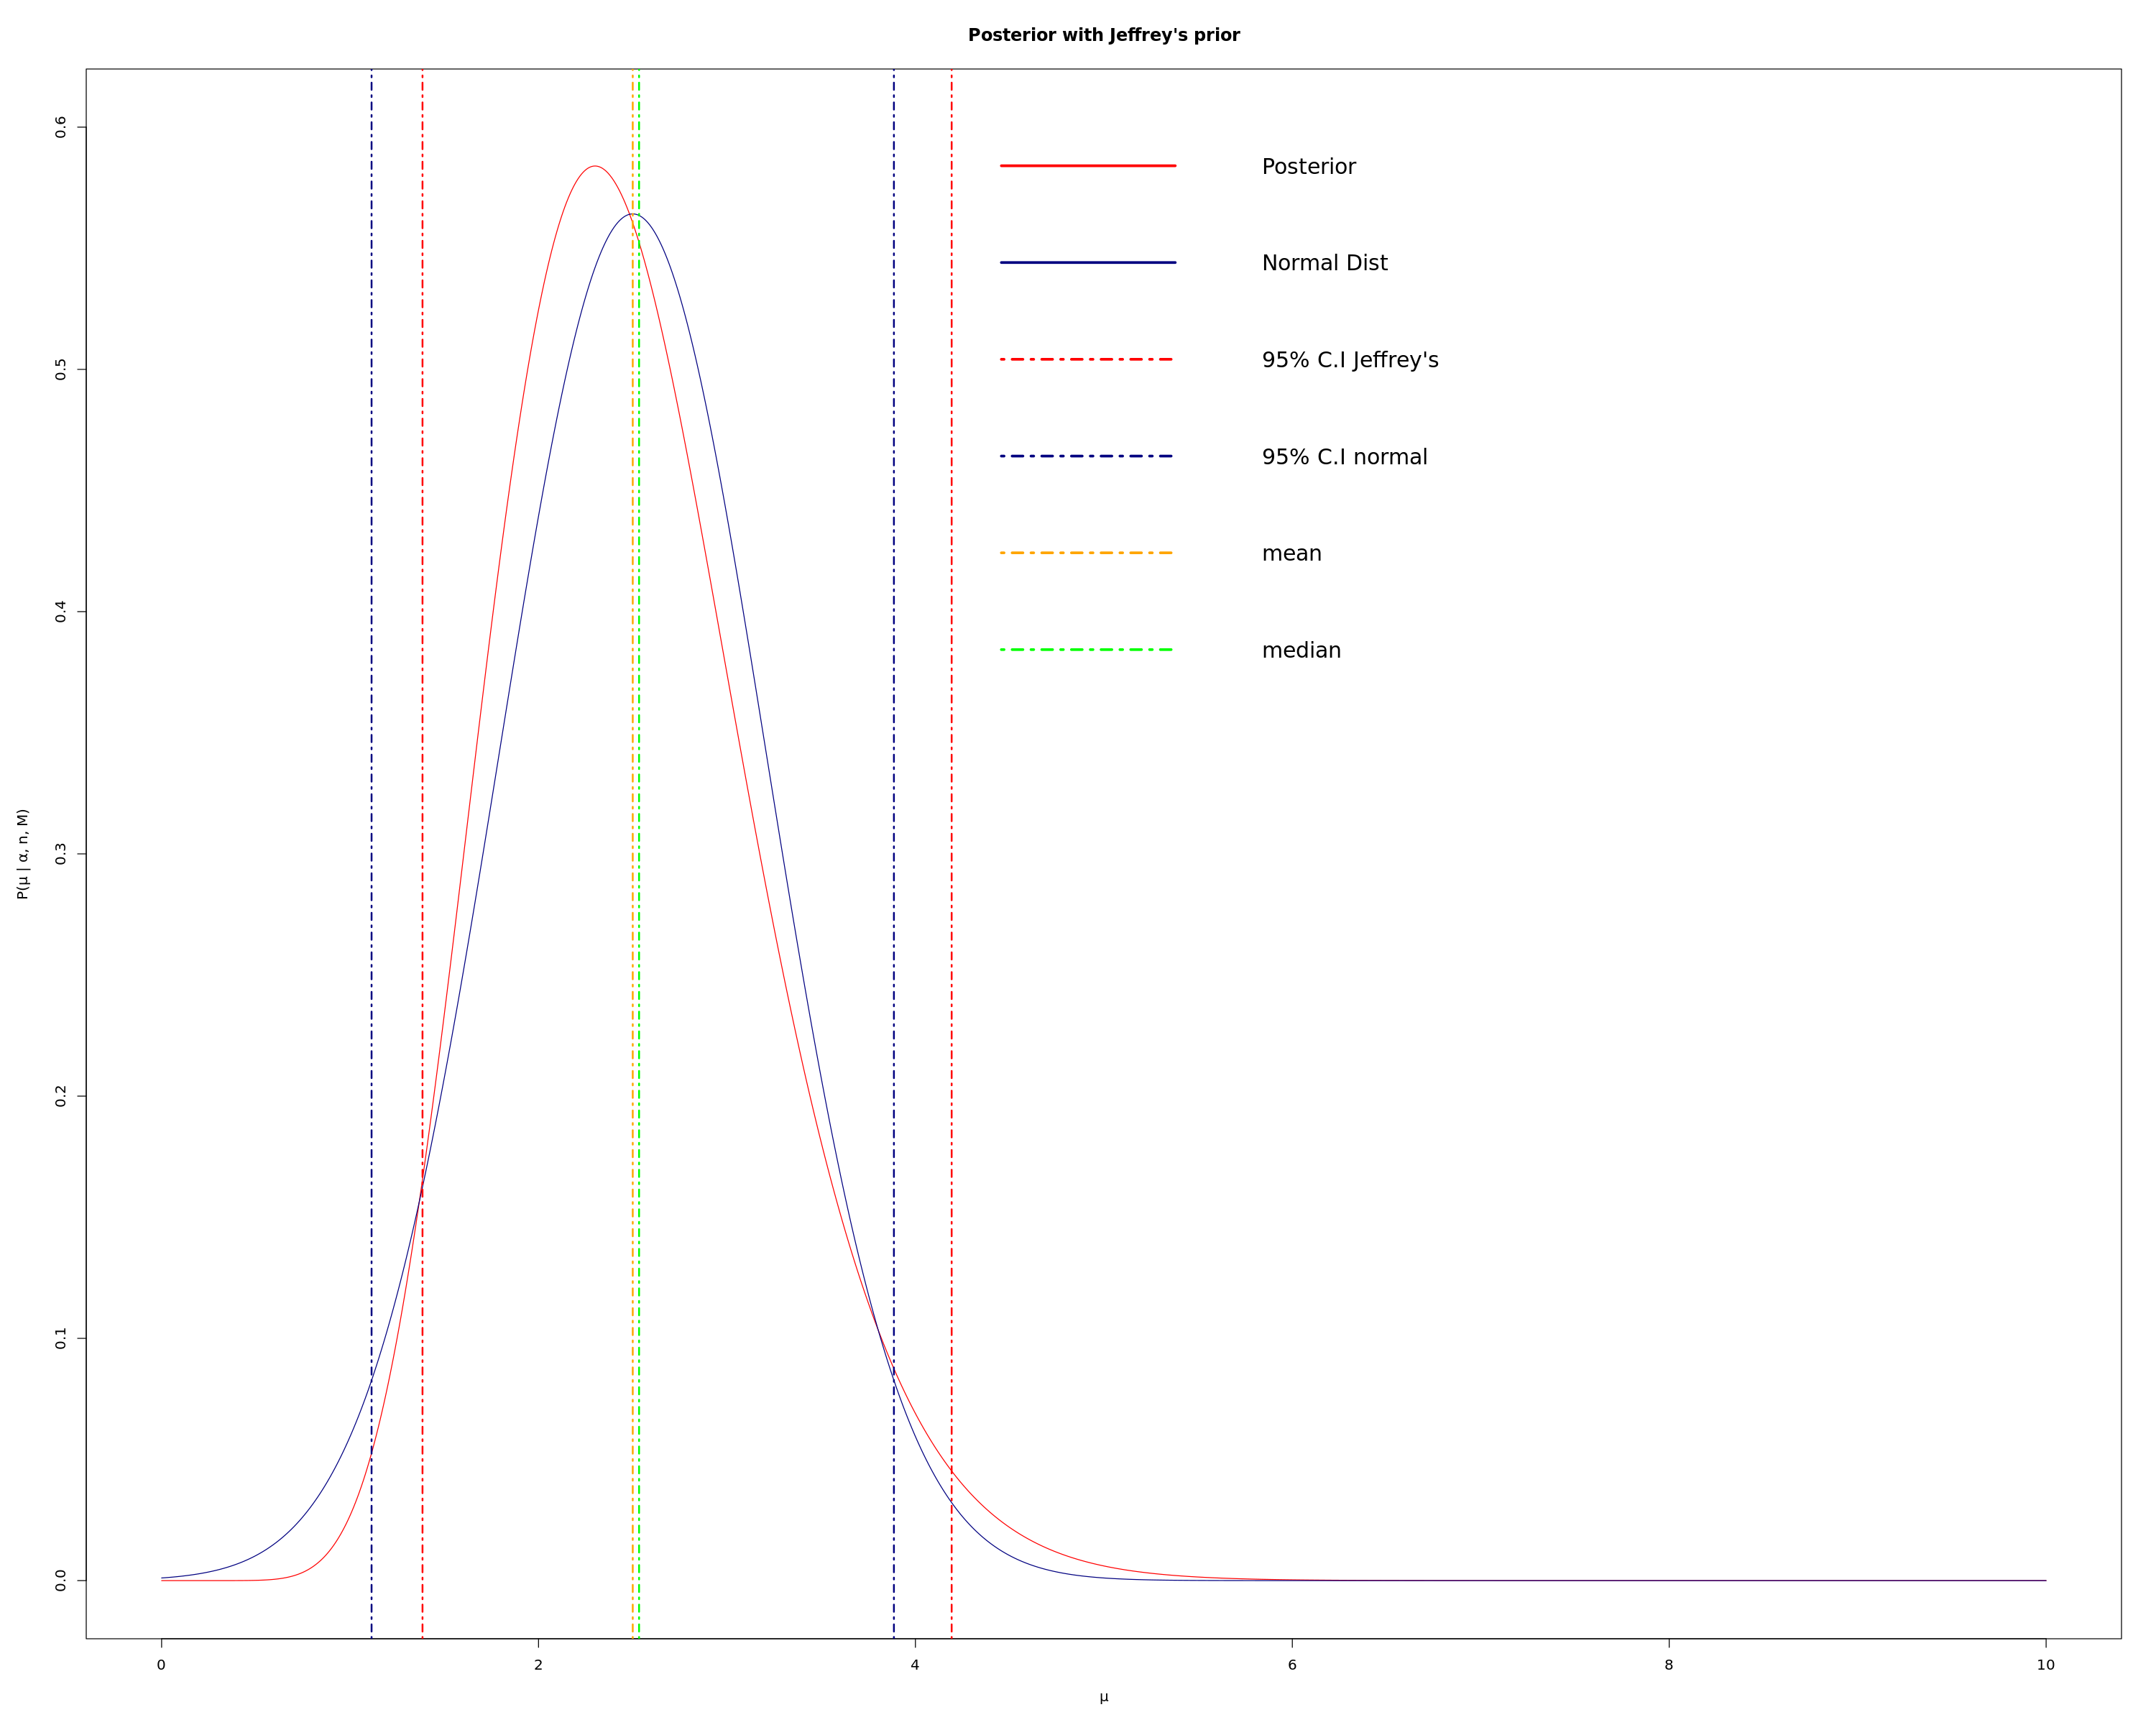

In [200]:
# numerical solutions
exp_mu_jef <- function(mu){
     return(dgamma(mu, alpha_jef, n)*mu) 
}

exp_mu_sq_jef <- function(mu){
     return(dgamma(mu, alpha_jef, n)*mu*mu) 
}

mean_num_jef<-integrate(exp_mu_jef, lower=0, upper= Inf)$value
exp_sq_jef <- integrate(exp_mu_sq_jef, lower=0, upper= Inf)$value
var_num_jef <- exp_sq_jef - mean_num_jef^2

mean_num_jef #just left these to show that its not excactly the true values
var_num_jef #it gets rounded in the concatinate 
median_num_jef <- qgamma(0.5, alpha, n)


cat("mean = ", mean_num_jef, ", varience = ", var_num_jef, ", median = ", median_num_jef)


CI_95_l_jef <- qgamma(0.025, alpha, n)
CI_95_u_jef <- qgamma(0.975, alpha, n)


norm <- dnorm(mu, mean_jef, sqrt(var_jef))
mu_95_l_norm <- qnorm(0.025, mean_jef, sqrt(var_jef)) 
mu_95_h_norm <- qnorm(0.975, mean_jef, sqrt(var_jef))

par(mar=c(5, 5, 4, 2))

plot(mu, posterior_jef, xlim=c(0,10), ylim=c(0,0.6),
     col="red",
     type="l",
     main="Posterior with Jeffrey's prior", 
     xlab=expression(mu), 
     ylab=expression(paste("P(", mu, " | ",alpha,", n, M)")),)

lines(mu, norm, col="navy")
abline(v=CI_95_l_jef, col='red', lty=4, lwd=2)
abline(v=CI_95_u_jef, col='red', lty=4, lwd=2)
abline(v=mean_jef, col='orange', lty=4, lwd=2)
abline(v=median_num_jef, col='green', lty=4, lwd=2)
abline(v=mu_95_l_norm, col='navy', lty=4, lwd=2)
abline(v=mu_95_h_norm, col='navy', lty=4, lwd=2)

legend('topright', col=c("red","navy", "red", "navy",  "orange", "green"), 
       lty=c(1,1, 4, 4, 4, 4), bty='n', cex=1.5, lwd=3,
       legend = c("Posterior","Normal Dist", "95% C.I Jeffrey's ", "95% C.I normal ", "mean", "median")
         )

<a href ="#contents">
<p style="text-align: right;">return to contents</p>
</a>  
<a id="ex2"></a> 

## Exercise 2: Given the problem of the lightouse discussed last week, study the case in which both the position along the shore ($\alpha$) and the distance out at sea ($\beta$) are unknown

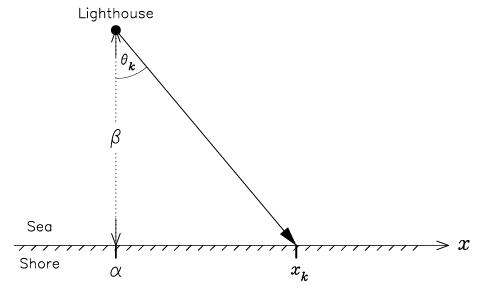

Assuming  a uniform Likelihood pdf on the azimuth angle $\theta_k$  
$$P(\theta_k | \alpha, \beta)=\frac{1}{\pi}$$

Where $\alpha$ and $\beta$ are linked by the follwing relation

$$x_k - \alpha = \beta \text{tan}\theta_k $$

Change of varibles on the pdf through

$$ P(X|M)=P(Y|M)\left|\frac{dY}{dX}\right|$$

Gives the cauchy ditribution 

$$P\left(x_k | \alpha, \beta\right)=P\left(\theta | \alpha, \beta\right) \left|\frac{d\theta}{dX}\right|= \frac{1}{\pi} \frac{\beta}{\left(x_k-\alpha \right)^{2}+\beta^{2}}$$

Bayes' theorem states 

$$P(\alpha |D, \beta) \propto P(D|\alpha, \beta) \times P(\alpha | \beta)$$

Beta and alpha are independent from each other

#### In our case $\alpha$ and $\beta$ are unknown. Therefore we need to assign proirs

We can assume that $\alpha$ and $\beta$ are normal to each other 

$$p(\alpha, \beta | \{x_k\}) \propto p(\{x_k\} | \alpha, \beta) p(\alpha) p(\beta)$$

The prior p($\alpha$) can be modelled by a uniform over a large enough segment [xmin,xmax], ie, p($\alpha$)=1/($x_{max}−x_{min}$).

Also assume that $\beta$ uniform in the interval $[0, y_{max}]$  

Then the posterior is proportional to the likelihood:  
$$p(\alpha, \beta | \{x_k\}) \propto p(\{x_k\} | \alpha, \beta)$$

### Start from known beta

mean =  15.48321 , median =  11.451 
mean looks like a bad estimator here

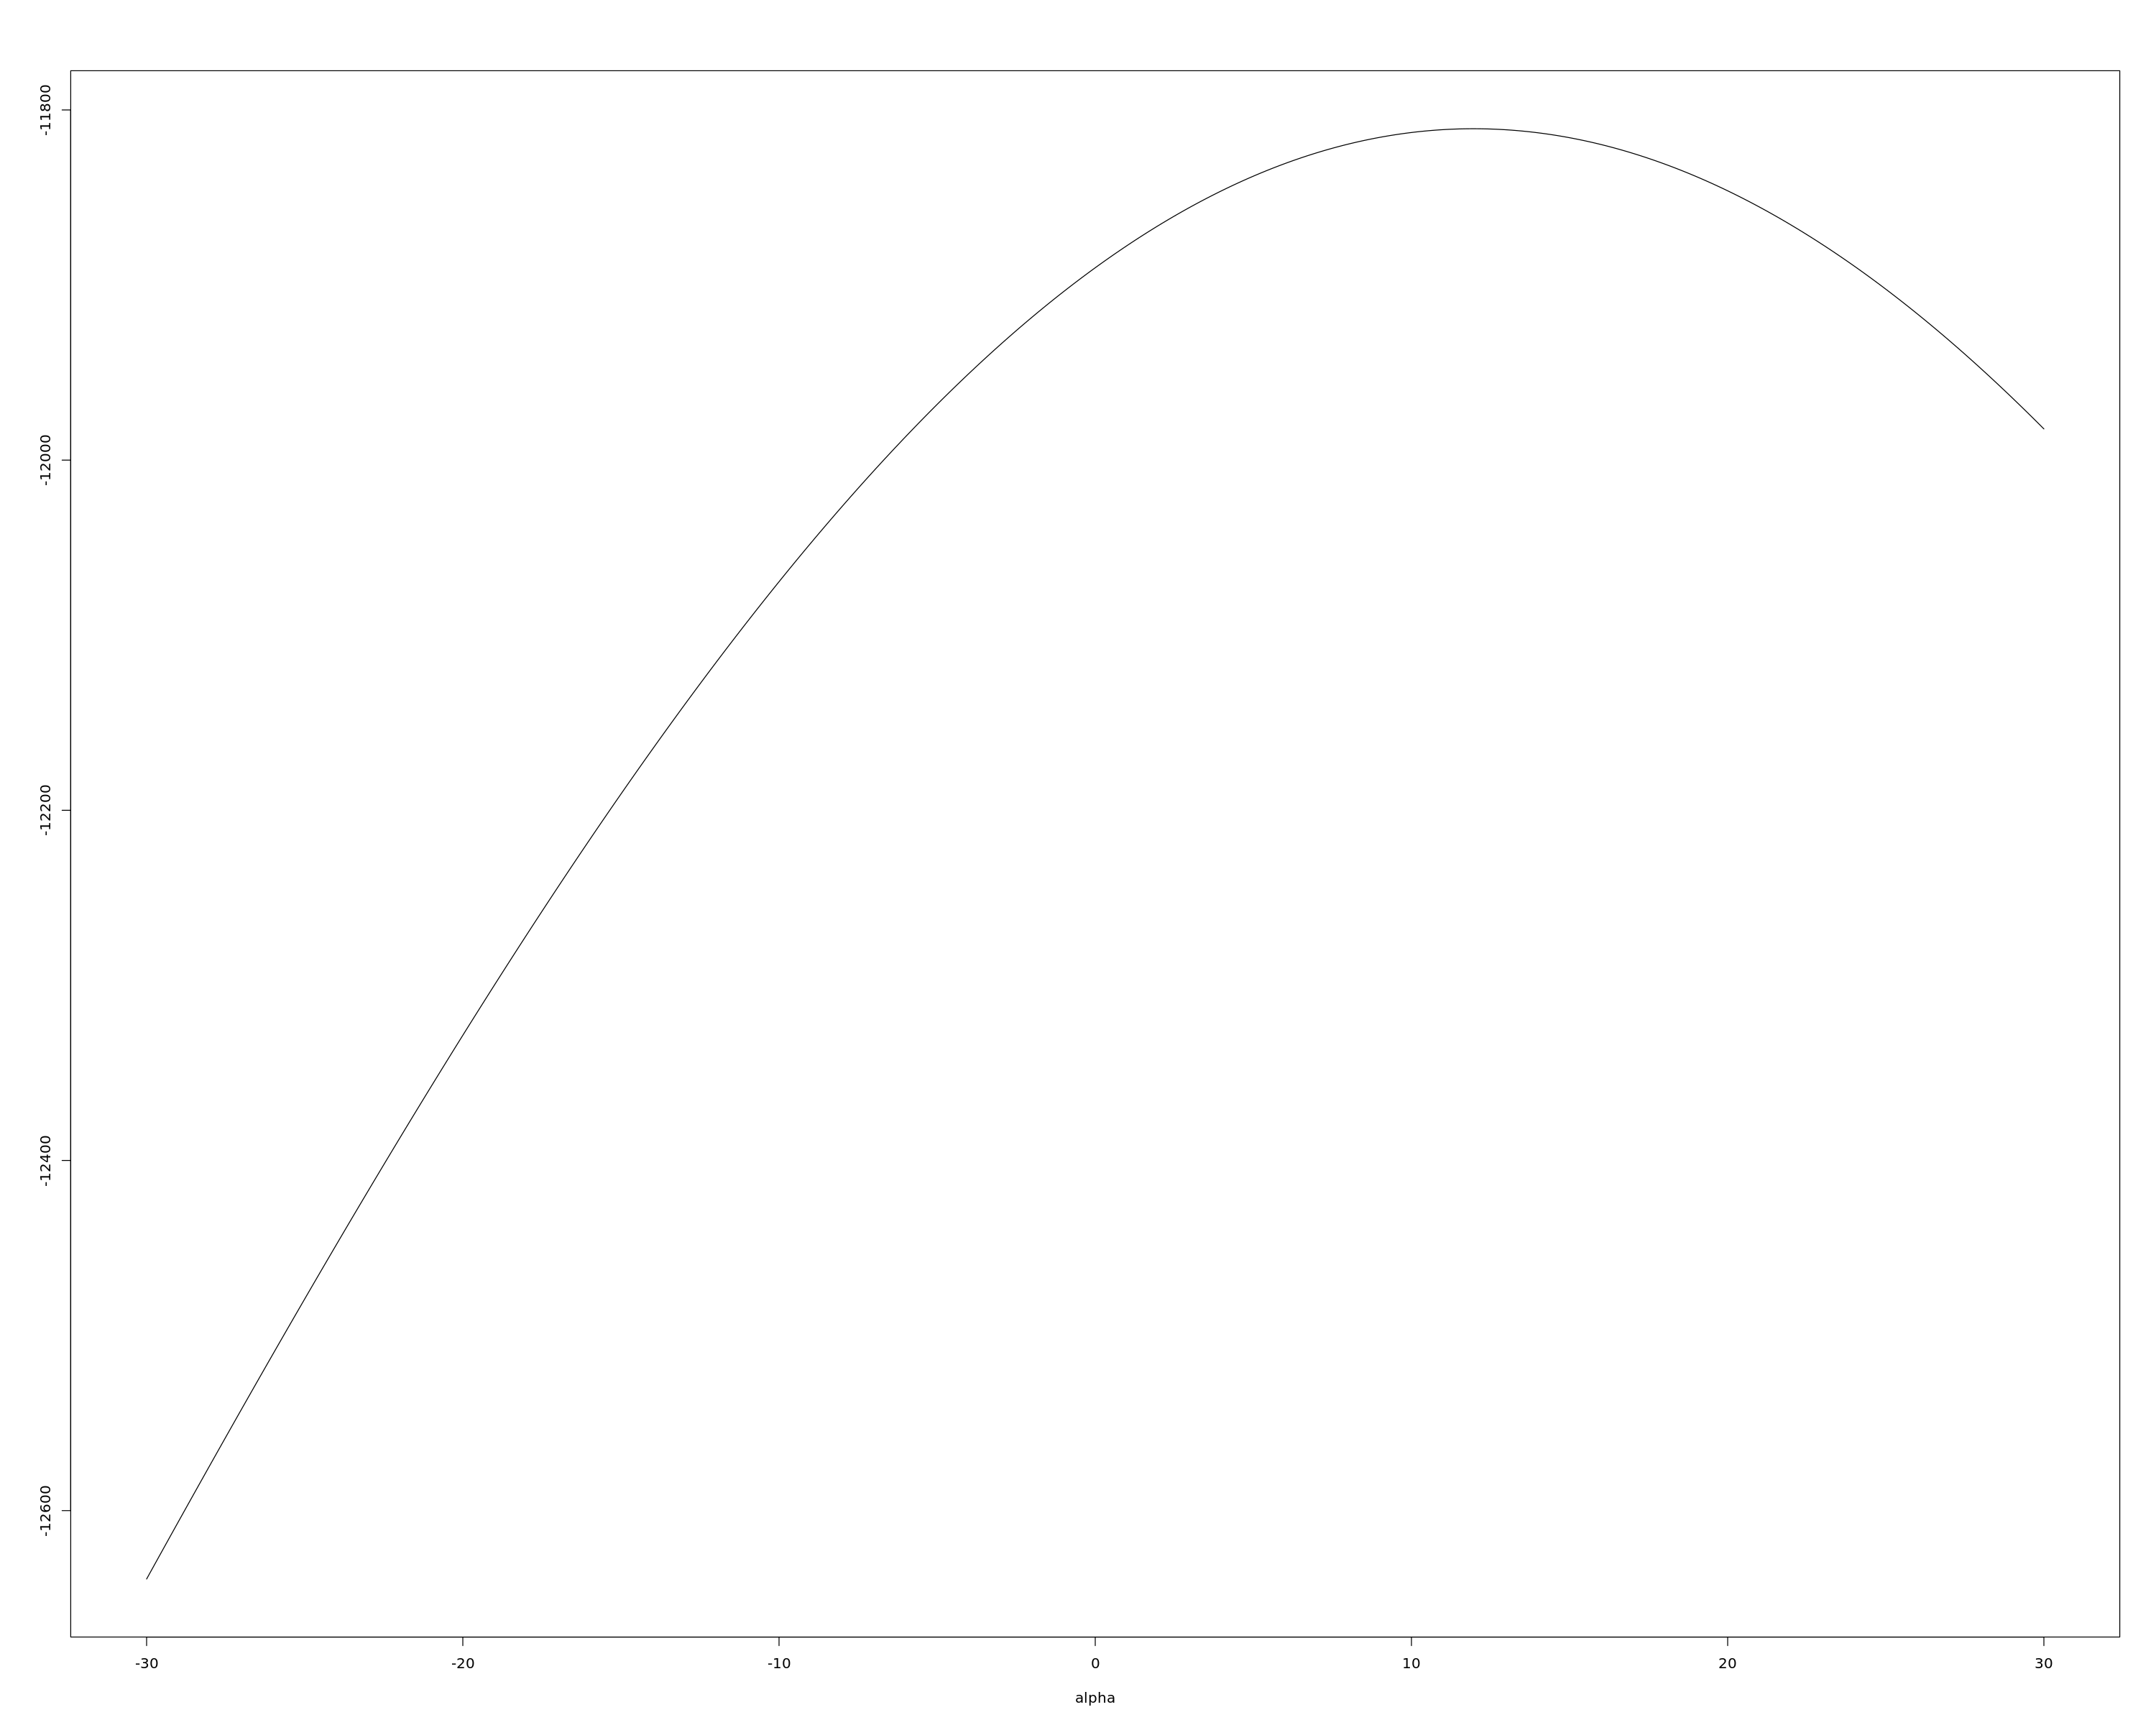

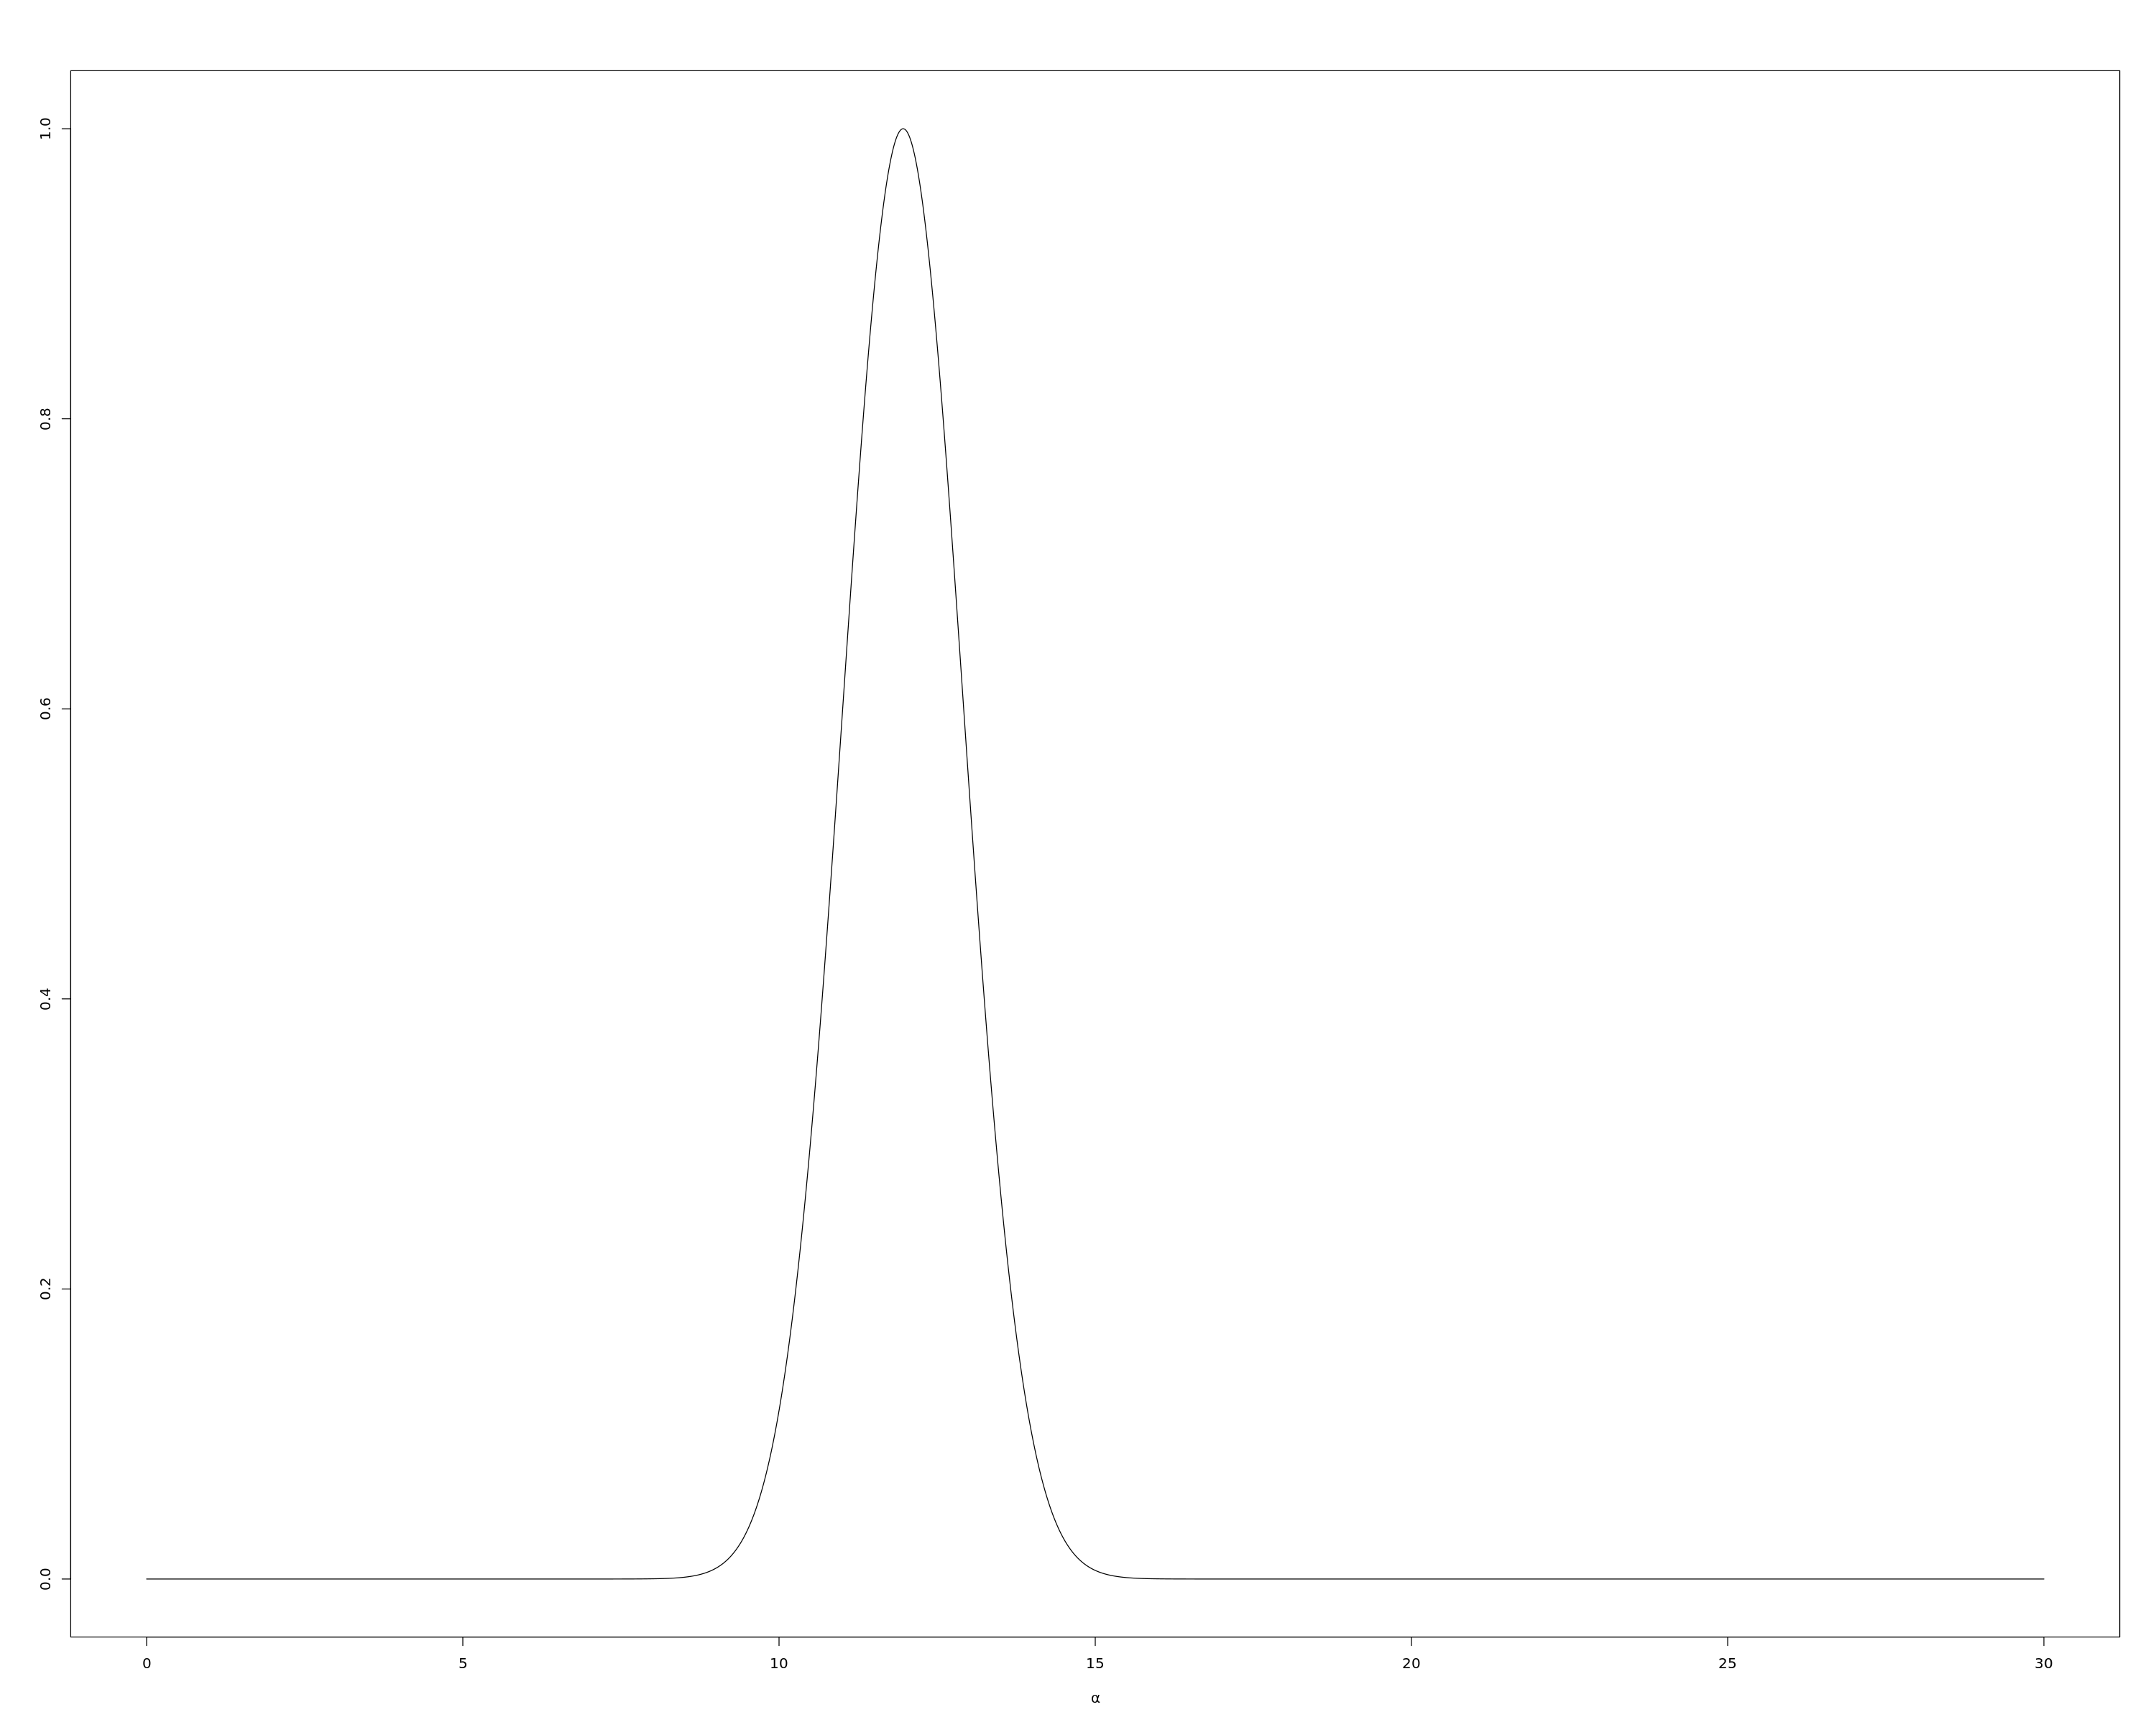

In [169]:
alpha <- 10 
beta  <- 30 

set.seed(12345)
N       <- 2000
theta_k <- runif(N,-pi/2,pi/2)
x_k     <- beta * tan(theta_k) + alpha

gen_log_posterior <- function (x_k, beta) {
  Vectorize(function (alpha_) {
              sum( log((beta/pi) / (beta^2 + (x_k - alpha_)^2)) )
           })
}

log_posterior <- gen_log_posterior(x_k, beta)
curve(log_posterior, from=-30, to=30, n=500, xlab="alpha", ylab="")

posterior_shape <- function(xs, log_posterior) {
  log_alphas    <- log_posterior(xs)        # compute log posterior for a grid of values
  log_alpha_max <- max(log_alphas)            
  alphas <- exp(log_alphas - log_alpha_max) # subtract from L_max, and exponentiate
  alphas                                    #  then the max value will be 1
}

cat("mean = ", mean(x_k), ", median = ", median(x_k), "\n")
cat("mean looks like a bad estimator here")
xs <- seq(0,30,0.001)
plot(xs, posterior_shape(xs, log_posterior), type="l", xlab=bquote(alpha), ylab="")

## Unknown $\beta$ and $\alpha$

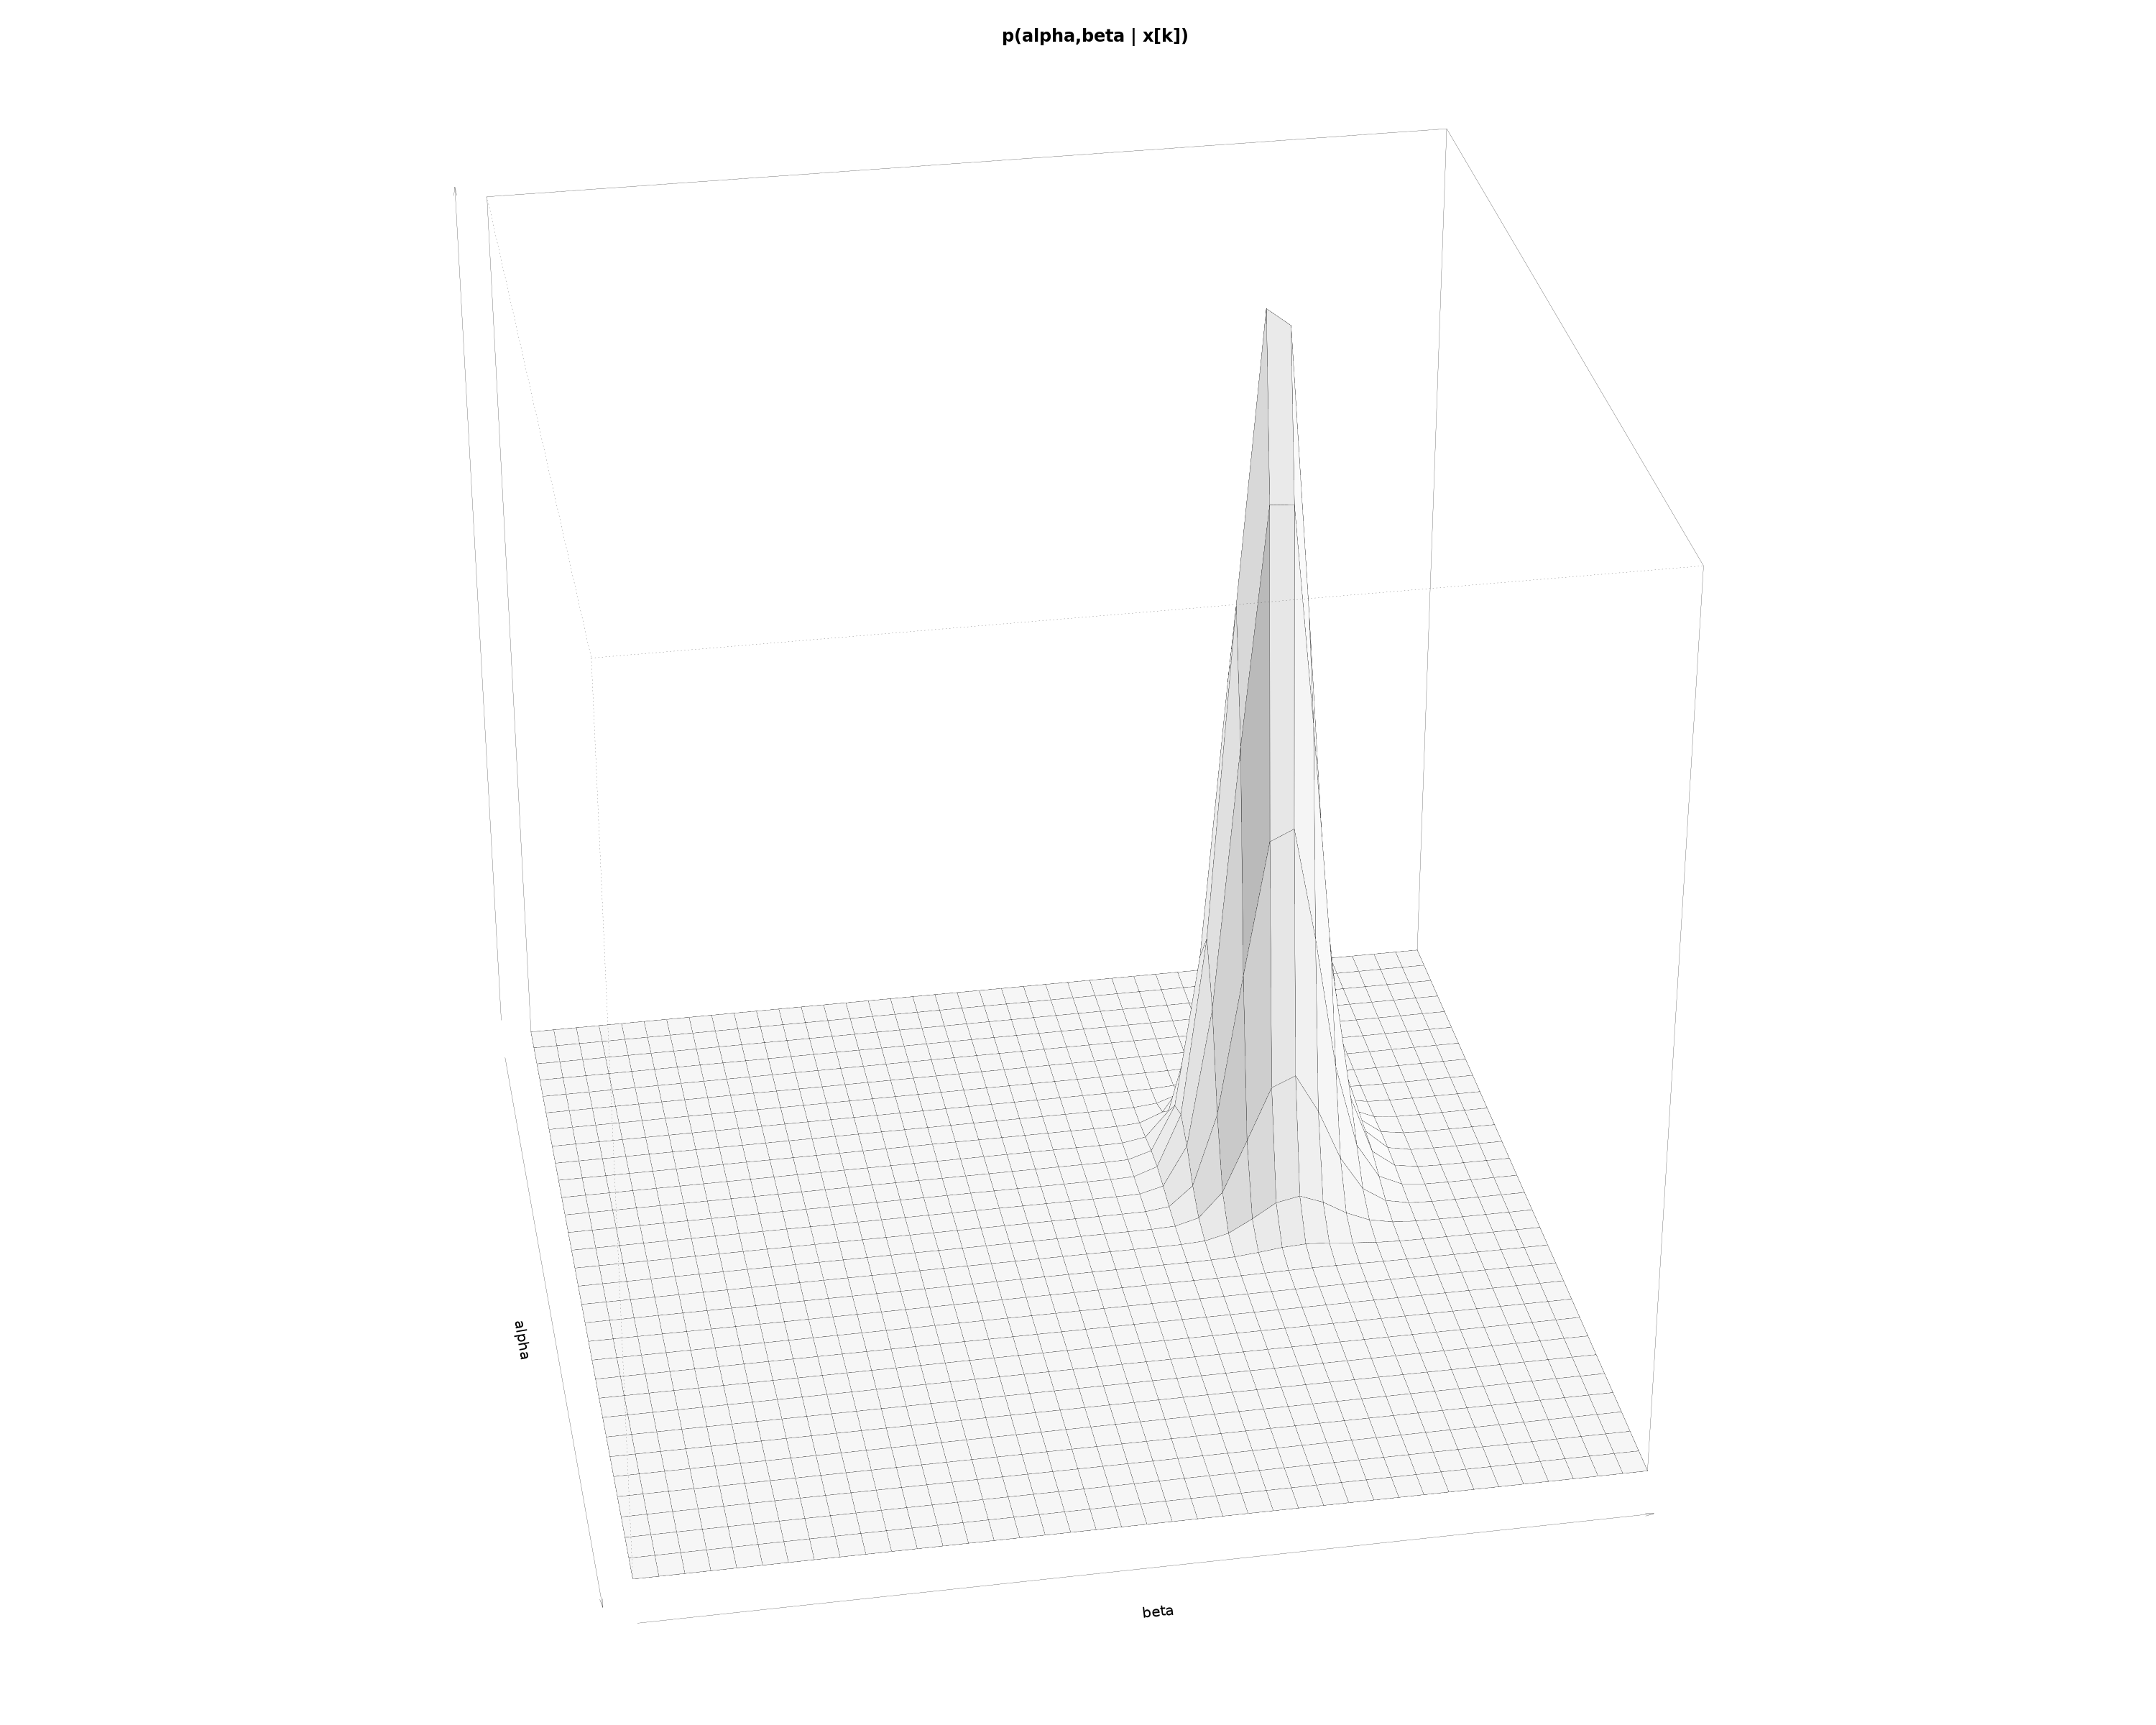

In [177]:
log_joint_posterior <- function (x_k, alfa, beta) {
  sum( log((beta/pi) / (beta^2 + (x_k - alfa)^2)) )
}

x_min <- 0
x_max <- 30
y_min <- 0
y_max <- 40

alphas <- seq(x_min, x_max)
betas  <- seq(    0, y_max)

f <- function(a,b) log_joint_posterior(x_k, a, b)

log_matrix_values <- outer(alphas, betas, Vectorize(f))

matrix_values <- matrix(posterior_shape(log_matrix_values, log_posterior),
                      nrow=length(alphas), ncol=length(betas))

persp(alphas, betas , matrix_values,
      xlab=bquote(alpha), ylab="beta", main="p(alpha,beta | x[k])", 
      zlab = "",
      cex=0.8, lwd=0.2  , 
      xlim=c(x_min,x_max), ylim=c(0,y_max), zlim=c(0,1),
      theta=80, phi=30, d=5.0, shade=0.05)


<a href ="#contents">
<p style="text-align: right;">return to contents</p>
</a>  
<a id="ex3"></a> 

## Exercise 3: given the Signal over Background example discussed last week, analyze and discuss the following cases:


1. vary the sampling resolution of used to generate the data, keeping the same sampling range xdat <- seq(from=-7*w, to=7*w, by=0.5*w)
    - change the resolution w = {0.1,0.25,1,2,3}
    - Check the effect on the results

### Signal Amplitude in presence of Background

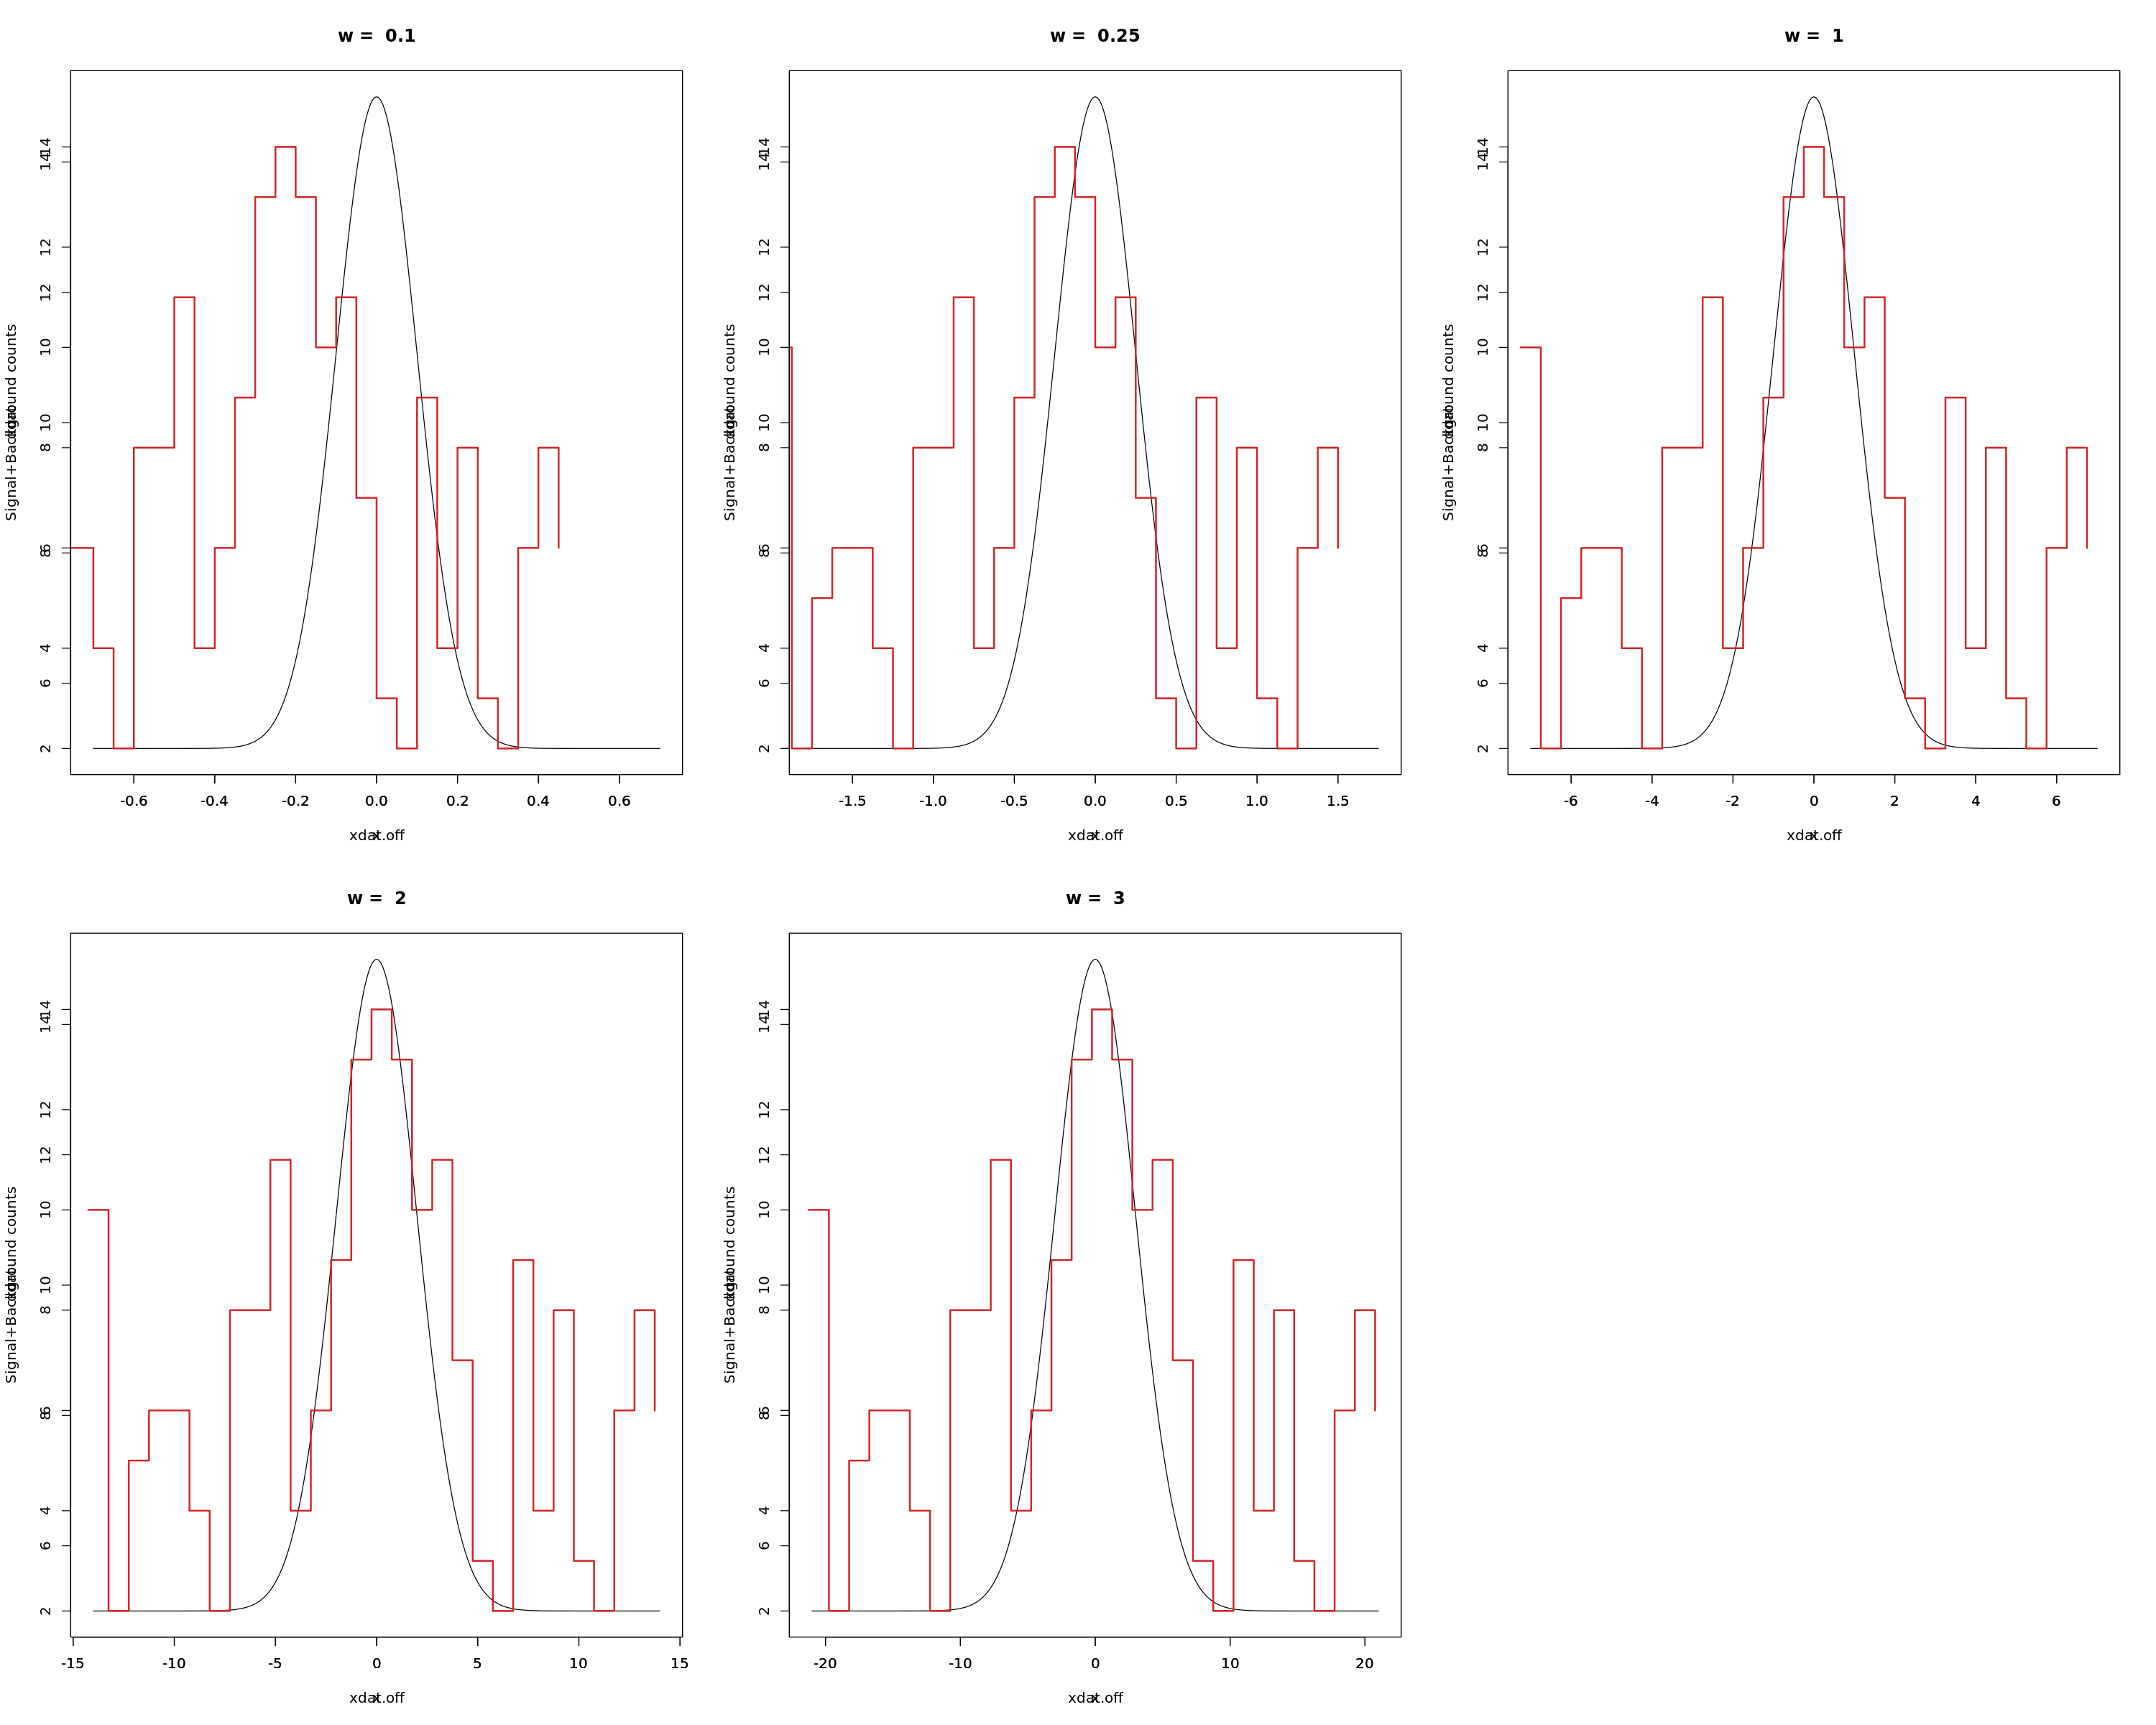

In [142]:
# Model gen
signal <- function(x, a, b, x0, w, t) {
    t * (a*exp(-(x-x0)^2/(2*w^2)) + b)
}

# Log posterior
log_posterior <- function (d, x, A, B, x0, w, Dt) {
    if (A<0 || B<0) {
        {return(-Inf)} # the effect of the prior
    } 
    sum(dpois(d, lambda=signal(x, A, B, x0, w, Dt), log=TRUE))
}

x0 <- 0 # Signal peak
w <-1 # Signal width
A.true <- 2 # Signal amplitude
B.true <- 1 # Background amplitude
Delta.t <- 5 # Exposure time

par(mfrow=c(2, 3), cex=1)
options(repr.plot.width=25, repr.plot.height=20)

for (w in resolutions){
    #BASE CODE FROM THE LECTURE SLIDES:
    # - Generate the observed data
    set.seed(205)
    xdat <- seq(from=-7*w, to=7*w, by=0.5*w)
    s.true <- signal(xdat , A.true , B.true , x0, w, Delta.t)
    ddat <- rpois(length(s.true), s.true)
    xplot <- seq(from=min(xdat), to=max(xdat), by=0.05*w)
    splot <- signal(xplot , A.true , B.true , x0, w, Delta.t)
    plot(xplot , splot , type="l", #####################
    xlab="x", ylab="Signal+Background counts", main= paste("w = ",w))
    par(new=TRUE)
    xdat.off <- xdat -0.25
    plot(xdat.off, ddat , type='s',col='firebrick3', ##########
    lwd=2,xlim=range(xplot), ylim=range(c(splot , ddat)))
}

As the resolution $w$ increases the signal background peak becomes shifts towards the center of the signal curve

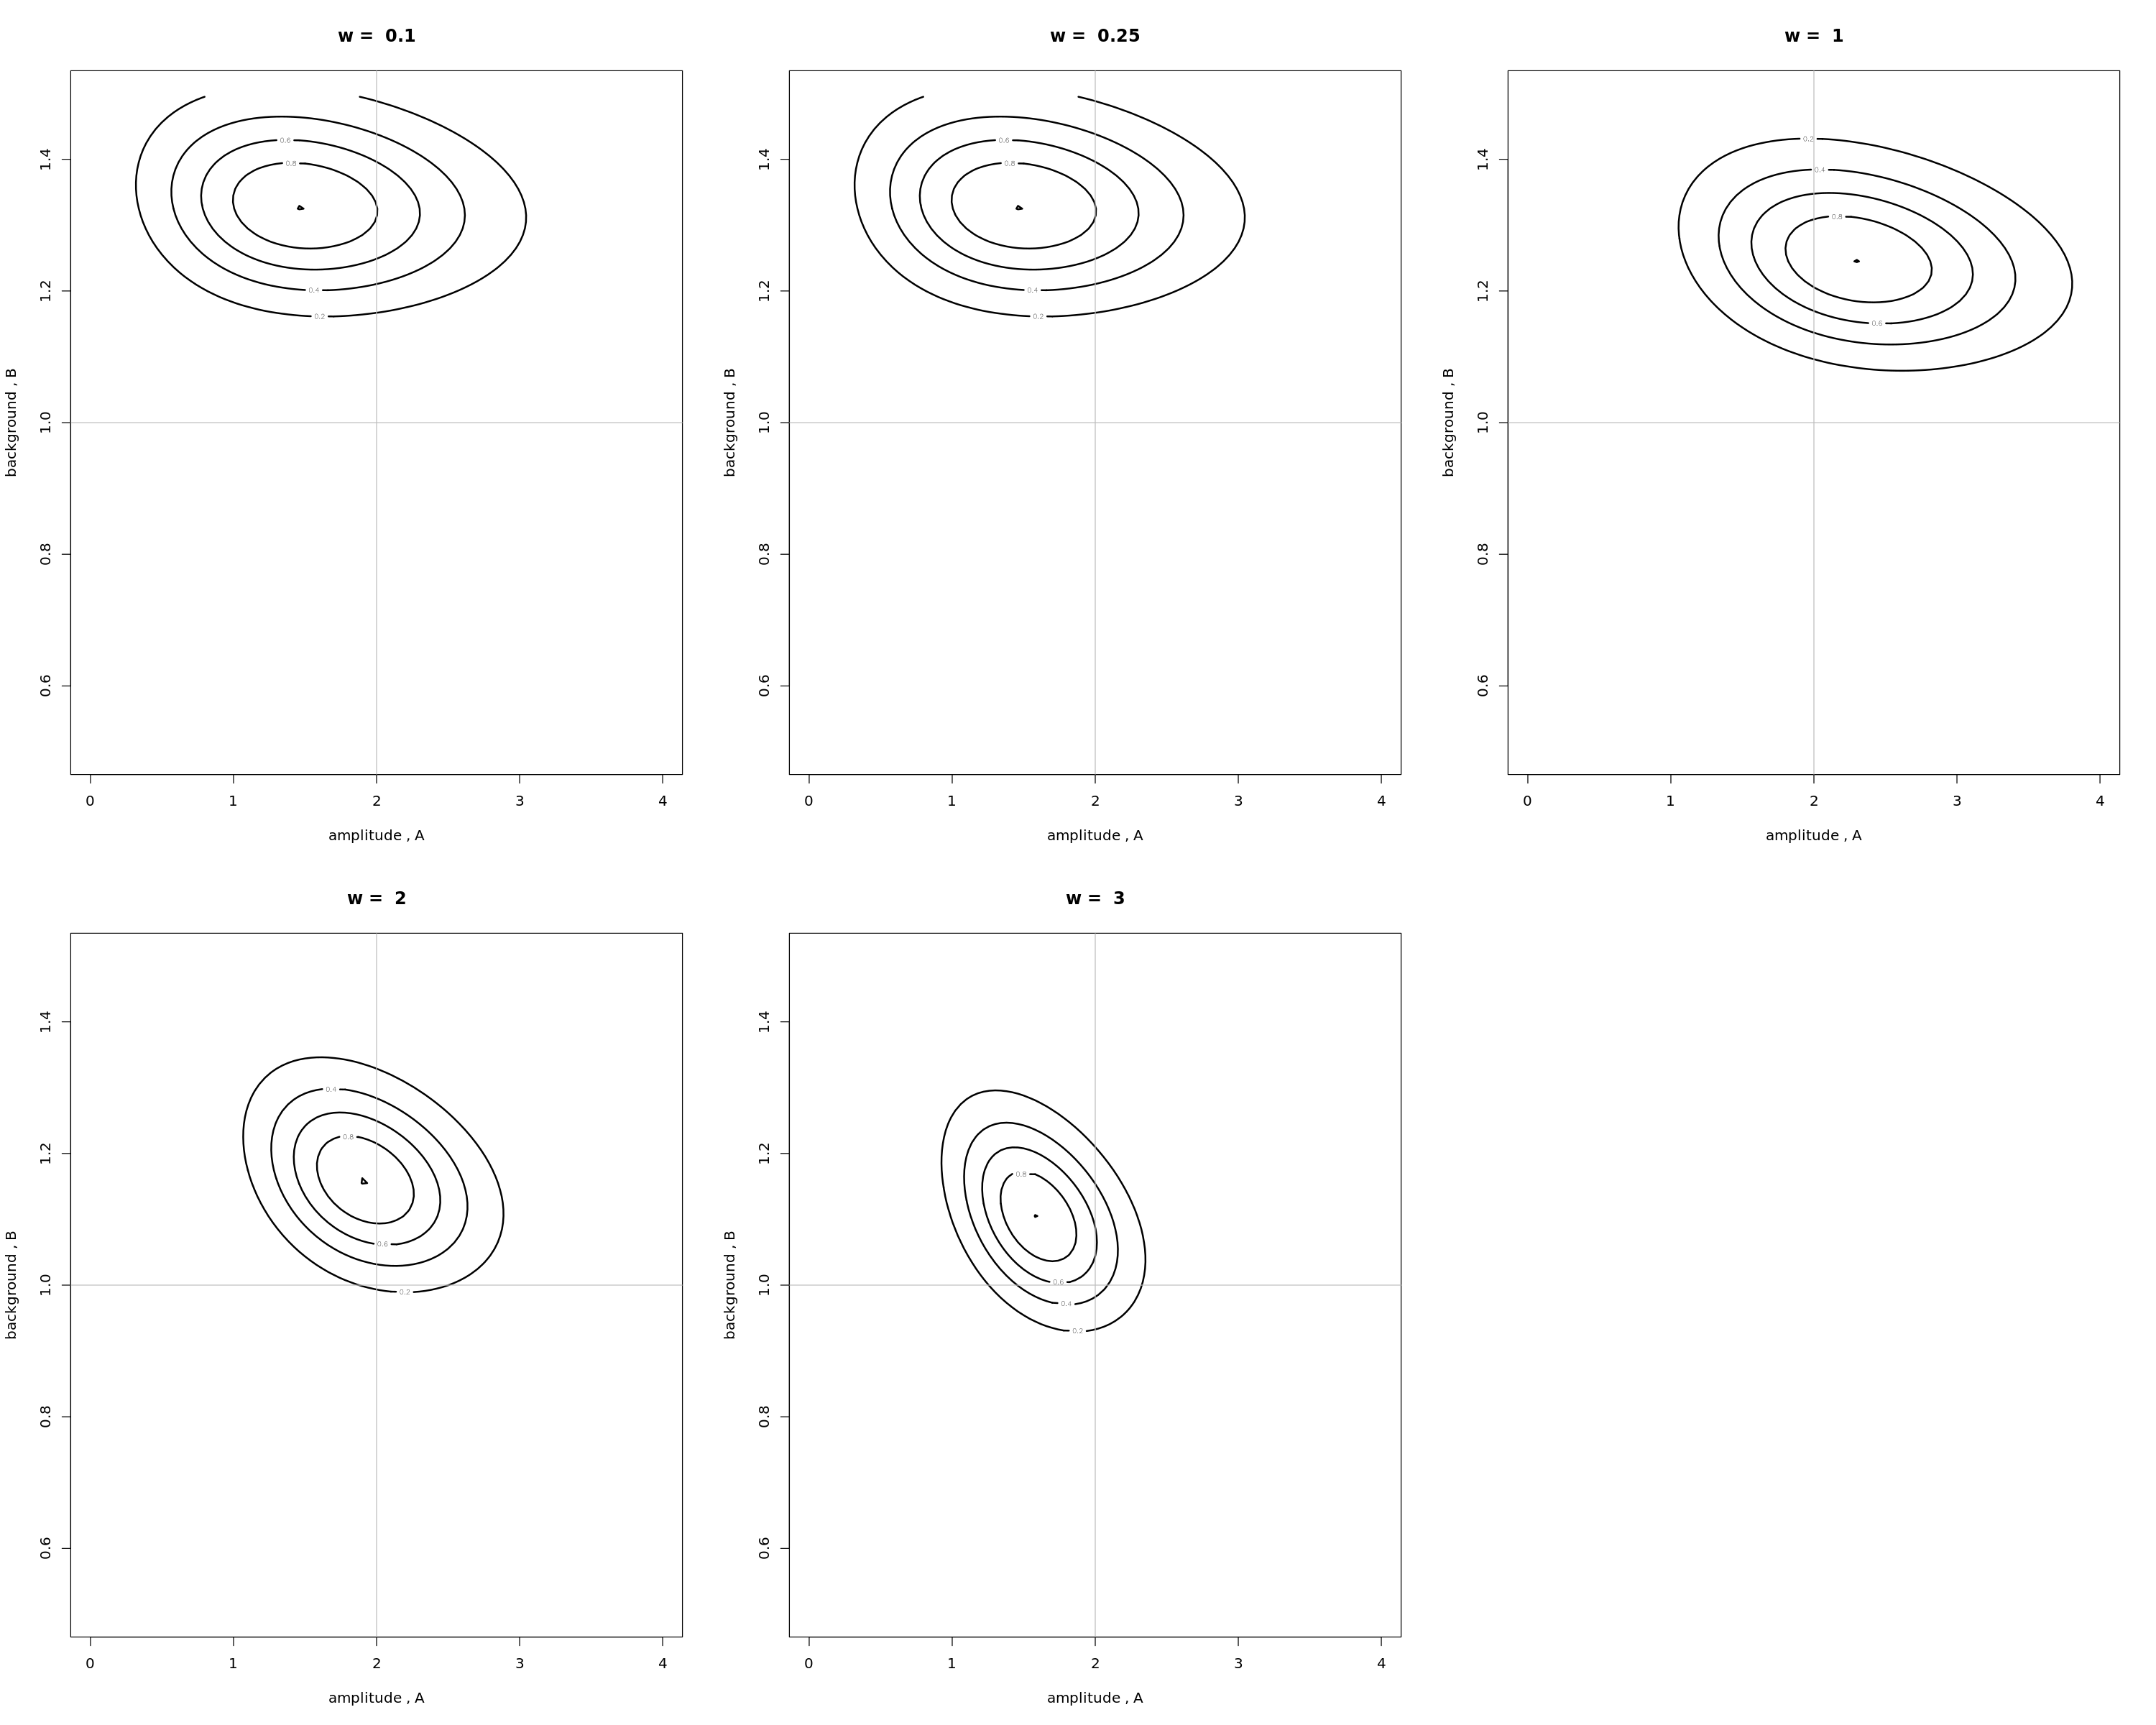

In [143]:
#- Sampling grid for computing posterior
alim <- c(0.0, 4.0)
blim <- c(0.5, 1.5)
Nsamp <- 100
uniGrid <- seq(from=1/(2*Nsamp),
to=1-1/(2*Nsamp), by=1/Nsamp)
delta_a <- diff(alim)/Nsamp
delta_b <- diff(blim)/Nsamp
a <- alim[1] + diff(alim)*uniGrid
b <- blim[1] + diff(blim)*uniGrid

par(mfrow=c(2, 3), cex=1)
options(repr.plot.width=25, repr.plot.height=20)

for (w in resolutions){

    # Compute log unnormalized posterior , z = ln P^*(a,b|D), on a regular grid
    z <- matrix(data=NA, nrow=length(a), ncol=length(b))
    for(j in 1:length(a)) {
        for(k in 1:length(b)) {
        z[j,k] <- log_posterior(ddat , xdat , a[j], b[k], x0, w, Delta.t)
        }
    }
    z <- z - max(z) # set maximum to zero
    # Plot unnormalized 2D posterior as contours.
    contour(a, b, exp(z), main= paste("w = ",w),
    nlevels = 5,
    labcex = 0.5,
    lwd = 2,
    xlab="amplitude , A",
    ylab="background , B")
    abline(v=2,h=1,col="grey")
}

Below a resolution of one the plots stayed a similar size but shifted position, when the values of w were greater than one the contour plots occupied  a smaller area 

2. change the ratio A/B used to simulate the data (keeping both positive in accordance with the prior) us to write:
     - Check the effect on the results


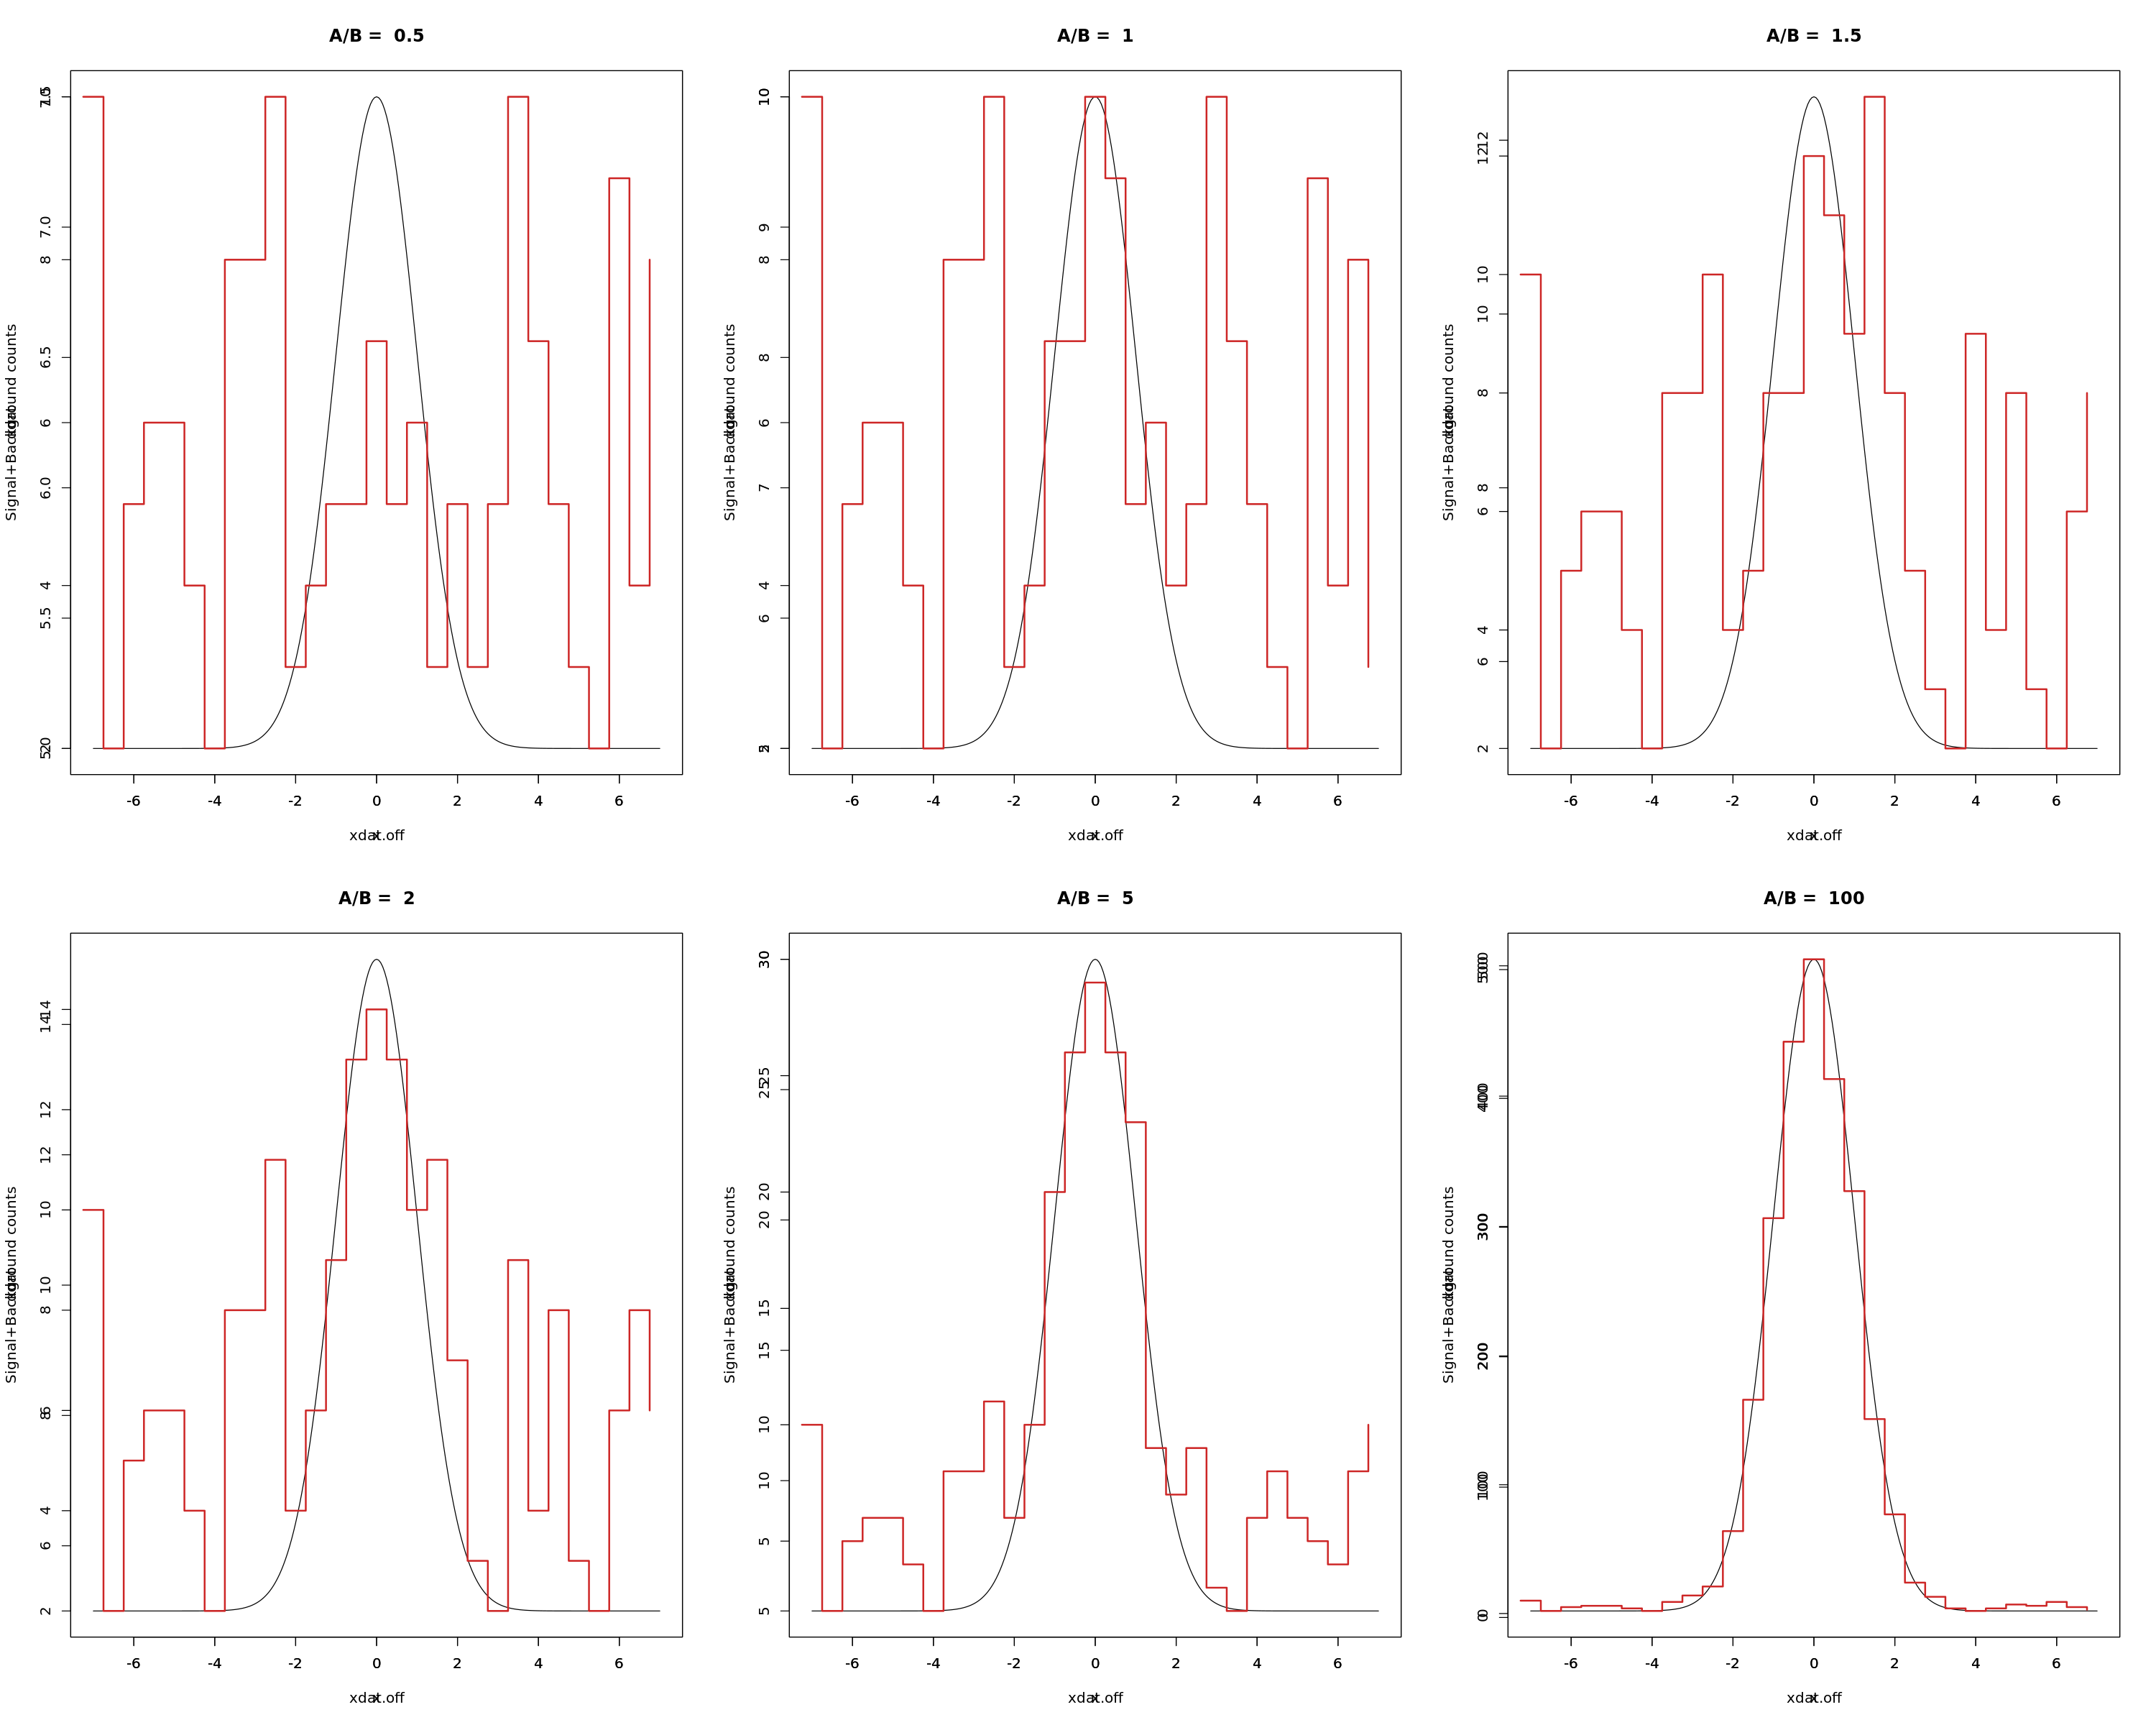

In [126]:
A.true <- 2 # Signal amplitude
B.true <- 1 # Background amplitude
Delta.t <- 5 # Exposure time
dA <- 0.01
A <- c(0.5, 1, 1.5, 2, 5, 100)

par(mfrow=c(2, 3), cex=1)
options(repr.plot.width=25, repr.plot.height=20)

for (a in A){
    #BASE CODE FROM THE LECTURE SLIDES:
    # - Generate the observed data
    w<-1
    set.seed(205)
    xdat <- seq(from=-7*w, to=7*w, by=0.5*w)
    s.true <- signal(xdat , a , B.true , x0, w, Delta.t)
    ddat <- rpois(length(s.true), s.true)
    xplot <- seq(from=min(xdat), to=max(xdat), by=0.05*w)
    splot <- signal(xplot , a , B.true , x0, w, Delta.t)
    plot(xplot , splot , type="l", 
    xlab="x", ylab="Signal+Background counts", main= paste("A/B = ",a/B.true))
    par(new=TRUE)
    xdat.off <- xdat -0.25
    plot(xdat.off, ddat , type='s',col='firebrick3', 
    lwd=2,xlim=range(xplot), ylim=range(c(splot , ddat)))
}

As the ratio of A/B increased the shape of the signal began to become more prominant over the background noise 

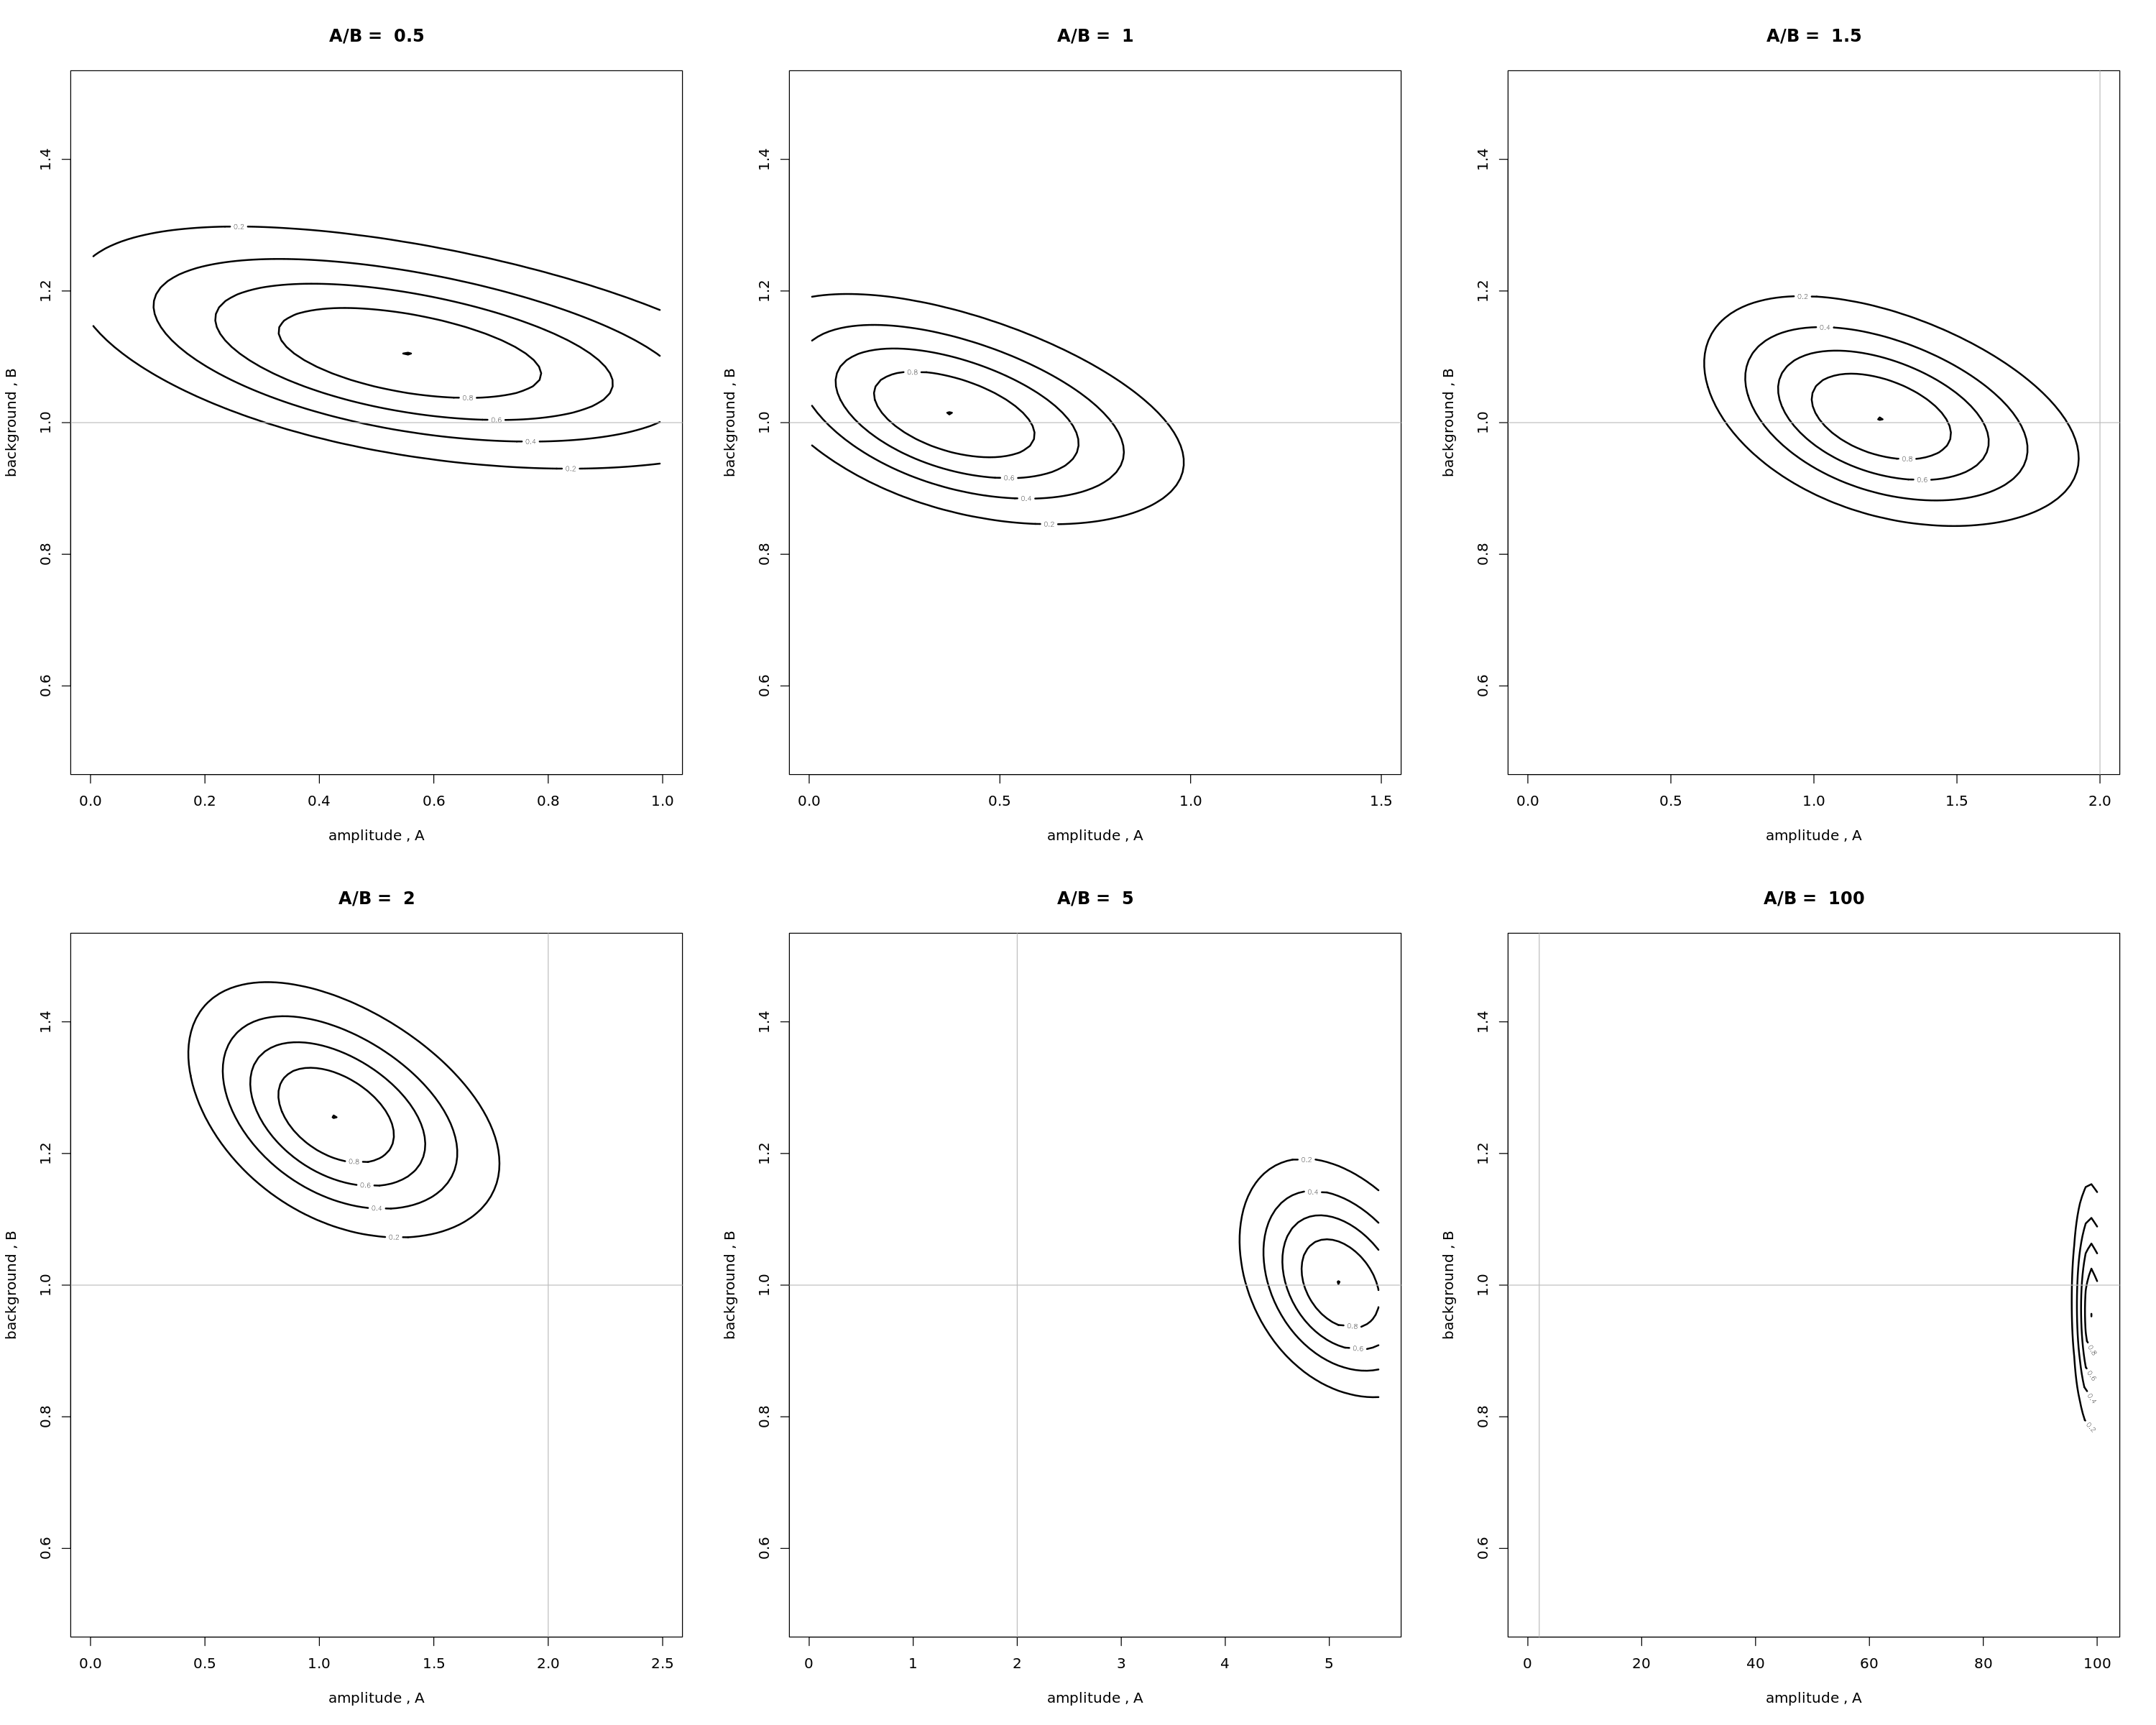

In [136]:
par(mfrow=c(2, 3), cex=1)
options(repr.plot.width=25, repr.plot.height=20)

for (a_ in A){
    alim <- c(0.0, a_+0.5)
    blim <- c(0.5, 1.5)
    Nsamp <- 100
    uniGrid <- seq(from=1/(2*Nsamp),
    to=1-1/(2*Nsamp), by=1/Nsamp)
    delta_a <- diff(alim)/Nsamp
    delta_b <- diff(blim)/Nsamp
    a <- alim[1] + diff(alim)*uniGrid
    b <- blim[1] + diff(blim)*uniGrid
    s.true <- signal(xdat , a_
                     , B.true , x0, w, Delta.t)
    ddat <- rpois(length(s.true), s.true)

    # Compute log unnormalized posterior , z = ln P^*(a,b|D), on a regular grid
    z <- matrix(data=NA, nrow=length(a), ncol=length(b))
    for(j in 1:length(a)) {
        for(k in 1:length(b)) {
        z[j,k] <- log_posterior(ddat , xdat , a[j], b[k], x0, w, Delta.t)
        }
    }
    z <- z - max(z) # set maximum to zero
    # Plot unnormalized 2D posterior as contours.
    contour(a, b, exp(z), main= paste("A/B = ",a_/B.true),
    nlevels = 5,
    labcex = 0.5,
    lwd = 2,
    xlab="amplitude , A",
    ylab="background , B")
    abline(v=2,h=1,col="grey")
}